## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Laoding Labraries

In [2]:
import numpy as np
import pandas as pd
import scipy.io
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras import Model,datasets
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten,
    Dropout, Reshape
)
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score

## SVM

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1)
y = Coadread_cancer_no_na['Subtype']

X = X.to_numpy()
y = y.tolist()

le = LabelEncoder()
y_enc = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y_enc).size
print(le_mapping )
Coadread_cancer_no_na.shape

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}


(341, 17496)

In [ ]:
from collections import Counter

# Count the occurrences of each class
class_counts = Counter(y)
print(class_counts)

# Calculate the total number of instances
total_instances = len(y)

# Calculate and print the percentage of each class
class_percentages = {cls: count / total_instances * 100 for cls, count in class_counts.items()}
for cls, percentage in class_percentages.items():
    print(f"Class '{cls}': {percentage:.1f}%")

Counter({'COAD_CIN': 226, 'COAD_MSI': 60, 'COAD_GS': 49, 'COAD_POLE': 6})
Class 'COAD_CIN': 66.3%
Class 'COAD_MSI': 17.6%
Class 'COAD_GS': 14.4%
Class 'COAD_POLE': 1.8%


### Cross Validation

In [ ]:
random_state = 38
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y_enc, test_size=0.15, random_state=random_state, stratify=y_enc)

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Lists to store metrics for each fold
fold_no = 1
accuracies = []
f1_scores = []
precisions = []
recalls = []
confusion_matrices = []
kappas = []
hamming_distances = []

for train_index, test_index in kf.split(X_train_temp):
    print(f"Training for fold{fold_no}...")
    X_train, X_val = X_train_temp[train_index], X_train_temp[test_index]
    y_train, y_val = y_train_temp[train_index], y_train_temp[test_index]

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train[:, var_filter])

    X_train = scaler.transform(X_train[:, var_filter])
    X_val = scaler.transform(X_val[:, var_filter])


    model = OneVsRestClassifier(svm.SVC(kernel='rbf',
                                        C = 3,
                                        probability=True,
                                        random_state=random_state
                                        ))
    clt = model.fit(X_train, y_train)
    y_pred = clt.predict(X_val)

    # Calculate metrics
    print(f"Accureacy: {accuracy_score(y_val, y_pred)}")
    accuracies.append(accuracy_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred, average='weighted', zero_division=0))
    precisions.append(precision_score(y_val, y_pred, average='weighted', zero_division=0))
    recalls.append(recall_score(y_val, y_pred, average='weighted', zero_division=0))
    confusion_matrices.append(confusion_matrix(y_val, y_pred))
    kappas.append(cohen_kappa_score(y_val, y_pred))
    hamming_distances.append(hamming_loss(y_val, y_pred))

    fold_no = fold_no + 1

    # Break the loop after the first iteration to test the code
    #break

Training for fold1...
Accureacy: 0.7586206896551724
Training for fold2...
Accureacy: 0.8620689655172413
Training for fold3...
Accureacy: 0.8275862068965517
Training for fold4...
Accureacy: 0.8275862068965517
Training for fold5...
Accureacy: 0.9310344827586207
Training for fold6...
Accureacy: 0.8620689655172413
Training for fold7...
Accureacy: 0.9655172413793104
Training for fold8...
Accureacy: 0.9310344827586207
Training for fold9...
Accureacy: 0.896551724137931
Training for fold10...
Accureacy: 0.8571428571428571


In [ ]:
# After cross-validation, calculate the average of the metrics
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1_score}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')

Average Accuracy: 0.8719211822660098
Average F1 Score: 0.8570628683234405
Average Precision: 0.8641232812214146
Average Recall: 0.8719211822660098


### Test Accuracy

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])
Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
print(Coadread_cancer_no_na.shape)
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1).values
y = Coadread_cancer_no_na['Subtype'].values
genes = Coadread_cancer_no_na.iloc[:, :-1].columns.to_numpy()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
print(Coadread_cancer_no_na.shape)

(459, 17496)
{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}
(341, 17496)


In [ ]:
start_time = time.time()
random_state = 38
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train= smote.fit_resample(X_train, y_train)

var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# Standardization
scaler = StandardScaler().fit(X_train[:, var_filter])

X_train = scaler.transform(X_train[:, var_filter])
X_test = scaler.transform(X_test[:, var_filter])


model = OneVsRestClassifier(svm.SVC(kernel='rbf',
                                    C = 3,
                                    probability=True,
                                    random_state=random_state
                                    ))
clt = model.fit(X_train, y_train)
y_pred = clt.predict(X_test)

# End timing
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time_1 = end_time - start_time
print(f"Elapsed time: {elapsed_time_1} seconds")

Elapsed time: 39.295759201049805 seconds


In [ ]:
# Calculate metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"Precision: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")

Accuracy: 0.8115942028985508
F1 Score: 0.7939045183290707
Precision: 0.7939045183290707


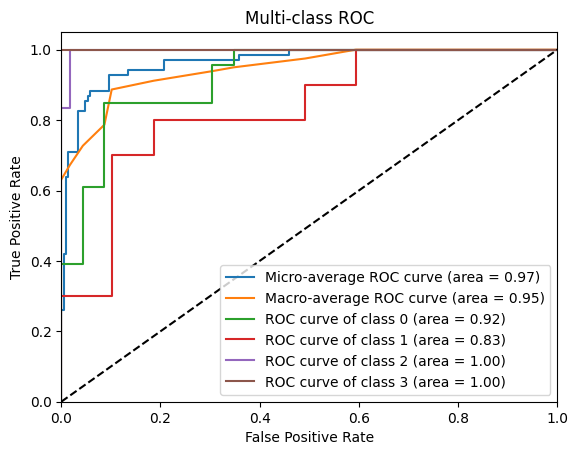

In [ ]:
# Assuming you have already split your data and trained your model

# Predict probabilities instead of classes
y_prob = clt.predict_proba(X_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

### Feature selection

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

random_state = 38
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=1207)
X_train, y_train = smote.fit_resample(X, y)

# var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')
retained_features = np.array(genes)

# # Standardization
# scaler = StandardScaler().fit(X_train[:, var_filter])

# X_train = scaler.transform(X_train[:, var_filter])
# X_test = scaler.transform(X_test[:, var_filter])

clt = OneVsRestClassifier(SVC(kernel='linear', C=3, random_state=random_state))
clt.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=3, kernel='linear', random_state=38))

In [ ]:
import numpy as np

# Extract feature coefficients from each classifier
coefficients = np.array([estimator.coef_[0] for estimator in clt.estimators_])

# Aggregate coefficients - you can use different methods like mean, absolute mean, max, etc.
# Here we use the absolute mean to consider overall importance irrespective of the class
feature_importance = np.mean(np.abs(coefficients), axis=0)

# Get the indices of the top 20 features
top_20_indices = np.argsort(feature_importance)[-20:]

# Retrieve the names of the top 20 features
top_20_features = retained_features[top_20_indices]
print(top_20_features)

['221823' '27112' '100131390' '4292' '342' '26780' '83894' '22943' '245'
 '1833' '220082' '284904' '6954' '11202' '55195' '790952' '92235' '84891'
 '444882' '286464']


### Different train test split ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
for ratio in split_ratio:
  # Start timing
  start_time = time.time()
  print(f"The split ratio is: {ratio}:")

  random_state = 38
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=random_state, stratify=y)

  smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  #var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

  # Standardization
  scaler = StandardScaler().fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)


  model = OneVsRestClassifier(svm.SVC(kernel='rbf',
                                      C = 3,
                                      probability=True,
                                      random_state=random_state
                                      ))
  clt = model.fit(X_train, y_train)

  y_pred = clt.predict(X_test)

  # Calculate metrics
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")
  print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")

  # End timing
  end_time = time.time()
  # Calculate and print the elapsed time
  elapsed_time = end_time - start_time
  print(f"Total elapsed time: {elapsed_time} seconds")

  # Get probability estimates
  y_pred_proba = clt.predict_proba(X_test)

  # Binarize the labels for AUC calculation
  y_test_binarized = label_binarize(y_test, classes=np.unique(y))

  # Calculate AUC for each class and average
  auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
  print(f"AUC: {auc_score}")


  avg_acc.append(accuracy_score(y_test, y_pred))
  avg_f1.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
  avg_pre.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
  avg_time.append(elapsed_time)
  avg_auc.append(auc_score)

The split ratio is: 0.1:


KeyboardInterrupt: 

In [ ]:
# Print the average metrics
print(f'Average Accuracy: {np.mean(avg_acc)}')
print(f'Average F1 Score: {np.mean(avg_f1)}')
print(f'Average Precision: {np.mean(avg_pre)}')
print(f'Average Computing time: {np.mean(avg_time)}')
print(f'Average AUC: {np.mean(avg_auc)}')

Average Accuracy: 0.836957520671481
Average F1 Score: 0.8136115525180792
Average Precision: 0.80609856512478
Average Computing time: 35.35228776931763
Average AUC: 0.9441506469418259


### Training 5 times for each ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []
avg_aupr = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
#[3, 8, 19, 66, 38]
#[20, 36, 48, 66, 86]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  avg_aupr_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()
    print(f"Training seed {seed}...")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    # smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    model = OneVsRestClassifier(svm.SVC(kernel='rbf',
                                        C = 3,
                                        probability=True,
                                        random_state=38
                                        ))
    clt = model.fit(X_train, y_train)

    y_pred = clt.predict(X_test)

    # Calculate metrics
    #print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    #print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")
    #print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    #print(f"Total elapsed time: {elapsed_time} seconds")

    # Get probability estimates
    y_pred_proba = clt.predict_proba(X_test)

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
    aupr = average_precision_score(y_test_binarized, y_pred_proba, average='weighted')
    #print(f"AUC: {auc_score}")

    avg_acc_s.append(accuracy_score(y_test, y_pred))
    avg_f1_s.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)
    avg_aupr_s.append(aupr)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage aupr: {np.mean(avg_aupr_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.1:
Training seed 3...
Training seed 8...
Training seed 19...
Training seed 66...
Training seed 38...
Avreage accuracy: 0.8685714285714285
Avreage F1: 0.8509102122367429
Avreage precision: 0.841143066457352
Avreage auc: 0.9360279566099304
Avreage aupr: 0.9228002530834406
Avreage time: 23.214015007019043
The split ratio is: 0.15:
Training seed 3...
Training seed 8...
Training seed 19...
Training seed 66...
Training seed 38...
Avreage accuracy: 0.8807692307692306
Avreage F1: 0.86401328184891
Avreage precision: 0.859035980857843
Avreage auc: 0.9352014502065803
Avreage aupr: 0.9155917003597933
Avreage time: 14.550135898590089
The split ratio is: 0.2:
Training seed 3...
Training seed 8...
Training seed 19...
Training seed 66...
Training seed 38...
Avreage accuracy: 0.881159420289855
Avreage F1: 0.8674136797732148
Avreage precision: 0.8653161956816972
Avreage auc: 0.9282078309616194
Avreage aupr: 0.9168600529595323
Avreage time: 13.292859506607055
The split ratio is: 0.2

### Other ratios


In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []
avg_aupr = []

split_ratio = [0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
#[3, 8, 19, 66, 38]
#[20, 36, 48, 66, 86]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  avg_aupr_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()
    print(f"Training seed {seed}...")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    if ratio > 0.4:
      neighbors = 1
    else:
      neighbors = 3

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=neighbors, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    #var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    model = OneVsRestClassifier(svm.SVC(kernel='rbf',
                                        C = 3,
                                        probability=True,
                                        random_state=38
                                        ))
    clt = model.fit(X_train, y_train)

    y_pred = clt.predict(X_test)

    # Calculate metrics
    #print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    #print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")
    #print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    #print(f"Total elapsed time: {elapsed_time} seconds")

    # Get probability estimates
    y_pred_proba = clt.predict_proba(X_test)

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
    aupr = average_precision_score(y_test_binarized, y_pred_proba, average='weighted')
    #print(f"AUC: {auc_score}")

    avg_acc_s.append(accuracy_score(y_test, y_pred))
    avg_f1_s.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)
    avg_aupr_s.append(aupr)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage aupr: {np.mean(avg_aupr_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.3:
Training seed 3...
Training seed 8...
Training seed 19...
Training seed 66...
Training seed 38...
Avreage accuracy: 0.833009708737864
Avreage F1: 0.8141026479587886
Avreage precision: 0.8142432057883122
Avreage auc: 0.9193696523013646
Avreage aupr: 0.9059251085150135
Avreage time: 37.99022922515869
The split ratio is: 0.4:
Training seed 3...
Training seed 8...
Training seed 19...
Training seed 66...
Training seed 38...
Avreage accuracy: 0.8423357664233577
Avreage F1: 0.8225183834616546
Avreage precision: 0.8266525575994468
Avreage auc: 0.9202730479053104
Avreage aupr: 0.9055791266341358
Avreage time: 29.162371253967287
The split ratio is: 0.5:
Training seed 3...
Training seed 8...
Training seed 19...
Training seed 66...
Training seed 38...
Avreage accuracy: 0.8385964912280702
Avreage F1: 0.8144734686689429
Avreage precision: 0.8264151436858949
Avreage auc: 0.9101258261560032
Avreage aupr: 0.90257299979212
Avreage time: 20.999508142471313
The split ratio is: 0.6

## DeepInsight

In [ ]:
!pip -q install git+https://github.com/changdali1207/pyDeepInsight.git#egg=pyDeepInsight
!pip install umap-learn
!pip install timm==0.9.12

from pyDeepInsight import ImageTransformer, CAMFeatureSelector
from pyDeepInsight.utils import Norm2Scaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import umap.umap_ as umap
import torch
import torchvision.transforms as transforms
import timm
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

from IPython.display import display, clear_output
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Activation , Dropout
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# Warnings
import warnings
warnings.filterwarnings("ignore")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.2 MB/s eta 0:00:00


In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1)
y = Coadread_cancer_no_na['Subtype']

X = X.to_numpy()
y = y.tolist()

le = LabelEncoder()
y_enc = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y_enc).size
print(le_mapping )
Coadread_cancer_no_na.shape

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}


(341, 17496)

### Cross Validation

In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y_enc, test_size=0.15, random_state=38, stratify=y_enc)
print(X_train_temp.shape)
print(X_test.shape)

random_state = 38
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Lists to store metrics for each fold
fold_no = 1
accuracies = []
f1_scores = []
precisions = []
recalls = []
confusion_matrices = []
kappas = []
hamming_distances = []


for train_index, test_index in kf.split(X_train_temp):
    print(f"Training for fold{fold_no}...")
    X_train, X_val = X_train_temp[train_index], X_train_temp[test_index]
    y_train, y_val = y_train_temp[train_index], y_train_temp[test_index]

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train[:, var_filter])
    X_val_norm = mms.transform(X_val[:, var_filter])

    distance_metric = 'cosine'
    reducer = TSNE(
        n_components=2,
        metric=distance_metric,
        init='random',
        learning_rate='auto',
        n_jobs=-1
    )

    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    pixel_size = (400,200)
    it = ImageTransformer(
        feature_extractor=reducer,
        pixels=pixel_size)

    it.fit(X_train_norm, y=y_train, plot=False)
    X_train_img = it.transform(X_train_norm)
    X_val_img = it.transform(X_val_norm)

    # Set random seed for reproducibility
    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Ensure deterministic behavior in PyTorch
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
    net = net.to(device)

    batch_size=16
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
    ])

    X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
    y_train_tensor = torch.from_numpy(y_train).to(device)
    trainset = TensorDataset(X_train_tensor, y_train_tensor)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

    X_val_tensor = torch.stack([preprocess(img) for img in  X_val_img]).float().to(device)
    y_val_tensor = torch.from_numpy(y_val).to(device)
    valset = TensorDataset(X_val_tensor, y_val_tensor)
    valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        net.parameters(),
        lr=1e-03,
        momentum=0.9,
        weight_decay=1e-04,
        nesterov=True
    )

    net.train()
    for epoch in range(80):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            #clear_output(wait=True)
            #display(f"Epoch {epoch:03d}, batch {i:03d}")
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            # print epoch statistics
        if not (epoch % 10):
            print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
    print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

    val_predicted = np.empty(0)
    val_true = np.empty(0)

    net.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(valloader):
            pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
            val_predicted = np.append(val_predicted, pred)
            val_true = np.append(val_true, labels.cpu().detach().numpy())

    # Calculate metrics
    print(f"Accuracy: {accuracy_score(val_predicted, val_true) * 100 :.3f}")
    accuracies.append(accuracy_score(val_predicted, val_true))
    f1_scores.append(f1_score(val_predicted, val_true, average='weighted', zero_division=0))
    precisions.append(precision_score(val_predicted, val_true, average='weighted', zero_division=0))
    recalls.append(recall_score(val_predicted, val_true, average='weighted', zero_division=0))

    fold_no = fold_no + 1

(289, 17495)
(52, 17495)
Training for fold1...
[0] loss: 1.03135983
[10] loss: 0.03755909
[20] loss: 0.01132114
[30] loss: 0.00450740
[40] loss: 0.00287105
[50] loss: 0.00229958
[60] loss: 0.00428217
[70] loss: 0.00127268
[79] loss: 0.00373071
Accuracy: 79.310
Training for fold2...
[0] loss: 1.04367324
[10] loss: 0.04955477
[20] loss: 0.01712260
[30] loss: 0.00657672
[40] loss: 0.00340432
[50] loss: 0.01980170
[60] loss: 0.01488381
[70] loss: 0.00157424
[79] loss: 0.00107360
Accuracy: 82.759
Training for fold3...
[0] loss: 1.07807078
[10] loss: 0.07791562
[20] loss: 0.02705326
[30] loss: 0.00772023
[40] loss: 0.00461013
[50] loss: 0.00308344
[60] loss: 0.00163078
[70] loss: 0.00227574
[79] loss: 0.00098728
Accuracy: 86.207
Training for fold4...
[0] loss: 1.04578177
[10] loss: 0.04079509
[20] loss: 0.01180013
[30] loss: 0.00637374
[40] loss: 0.00337640
[50] loss: 0.00283961
[60] loss: 0.00567014
[70] loss: 0.00453231
[79] loss: 0.00111291
Accuracy: 79.310
Training for fold5...
[0] loss:

In [ ]:
# After cross-validation, calculate the average of the metrics
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1_score}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')

Average Accuracy: 0.8653940886699505
Average F1 Score: 0.876097640198475
Average Precision: 0.9022149639465982
Average Recall: 0.8653940886699505


### Test Accuracy

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1).values
y = Coadread_cancer_no_na['Subtype'].values
genes = Coadread_cancer_no_na.iloc[:, :-1].columns.to_numpy()

le = LabelEncoder()
y_enc = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y_enc).size
print(le_mapping )
print(Coadread_cancer_no_na.shape)

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}
(341, 17496)


In [ ]:
Coadread_cancer_no_na.head()

,100133144,100134869,10357,10431,155060,388795,390284,57714,645851,653553,...,11130,7789,158586,79364,440590,79699,7791,23140,26009,Subtype
0,18.0851,15.7640,144.400,774.662,441.973,2.4178,2.9014,416.344,15.9574,287.2340,...,629.594,71.0832,461.315,1105.42,3.3849,543.037,6259.19,1358.32,798.356,COAD_CIN
1,4.4315,4.2767,142.661,1185.290,522.013,2.4190,2.9028,181.422,20.8031,552.4910,...,442.187,39.6710,366.715,1149.49,0.4838,290.760,4653.12,1220.13,333.817,COAD_CIN
2,9.8995,11.3032,143.199,888.320,288.064,2.9245,3.6556,391.885,13.1603,219.3380,...,1033.080,31.4385,349.479,1083.53,0.0000,669.713,4460.61,3002.01,530.068,COAD_CIN
3,7.9174,18.7608,146.188,1280.550,379.518,2.1515,1.2909,413.511,12.4785,60.6713,...,1629.090,54.6472,542.169,1374.35,0.4303,445.353,4190.19,1093.37,574.441,COAD_CIN
4,12.2565,20.8826,262.511,1299.840,279.456,8.9030,3.4623,271.543,10.8815,125.1370,...,838.864,29.1822,428.335,1240.98,3.4623,550.504,3878.26,1016.43,413.002,COAD_CIN


In [ ]:
# Start timing
start_time = time.time()
X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size=0.2, random_state=38, stratify=y_enc)

smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train_enc = smote.fit_resample(X_train, y_train_enc)

var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')
retained_features = np.array(genes)[var_filter]

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train[: , var_filter])
X_test_norm = mms.transform(X_test[: , var_filter])

distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    init='random',
    learning_rate='auto',
    n_jobs=-1
)

random_seed = 36
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

pixel_size = (400, 200)
it = ImageTransformer(
    feature_extractor=reducer,
    pixels=pixel_size)

it.fit(X_train_norm, y=y_train_enc, plot=False)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text(f"Train[{i}] - class '{y_train_enc[i]}'")
plt.tight_layout()

# End timing
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time_1 = end_time - start_time
print(f"Elapsed time: {elapsed_time_1} seconds")

NameError: name 'var_filter' is not defined

In [ ]:
retained_features.shape

(12247,)

In [ ]:
start_time = time.time()
# Set random seed for reproducibility
random_seed = 1450
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

# Ensure deterministic behavior in PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
net = net.to(device)

batch_size=16
preprocess = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
])

X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(y_train_enc).to(device)
trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
y_test_tensor = torch.from_numpy(y_test_enc).to(device)
testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-03,
    momentum=0.9,
    weight_decay=1e-04,
    nesterov=True
)

net.train()
for epoch in range(80):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        #clear_output(wait=True)
        #display(f"Epoch {epoch:03d}, batch {i:03d}")
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # print epoch statistics
    if not (epoch % 10):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

test_predicted = np.empty(0)
test_true = np.empty(0)

net.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(testloader):
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")
print(f"The F1 score was {f1_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")
print(f"The Precession was {precision_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")
# End timing
end_time = time.time()
# Calculate and print the elapsed time
elapsed_time_2 = end_time - start_time
print(f"Total elapsed time: {elapsed_time_1 + elapsed_time_2} seconds")

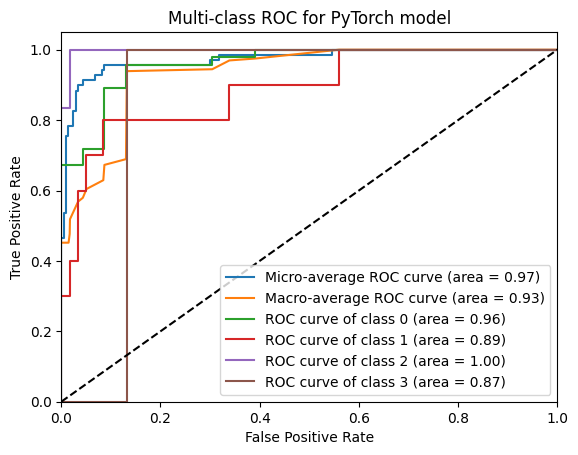

In [ ]:
# Your existing code for training the PyTorch model

# Compute probabilities instead of class predictions
test_probabilities = np.empty((0, num_classes))
test_true = np.empty((0, num_classes))

net.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
        test_probabilities = np.vstack([test_probabilities, probabilities])
        test_true = np.vstack([test_true, label_binarize(labels.cpu().numpy(), classes=np.arange(num_classes))])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_true[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_true.ravel(), test_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes  # Corrected from n_classes to num_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot(fpr["macro"], tpr["macro"], label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for PyTorch model')
plt.legend(loc="lower right")
plt.show()


### Feature selection

In [ ]:
# Start timing
start_time = time.time()
# X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size=0.2, random_state=38, stratify=y_enc)

# smote = SMOTE(sampling_strategy= 'auto', k_neighbors=5, random_state=1207)
#X_train, y_train_enc = smote.fit_resample(X, y_enc)
X_train, y_train_enc = X, y_enc

var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')
retained_features = np.array(genes)[var_filter]

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train[:, var_filter])
# X_test_norm = mms.transform(X_test[:, var_filter])

distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    init='random',
    learning_rate='auto',
    n_jobs=-1
)

random_seed = 36
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

pixel_size = (400,200)
it = ImageTransformer(
    feature_extractor=reducer,
    pixels=pixel_size)

it.fit(X_train_norm, y=y_train_enc, plot=False)
X_train_img = it.transform(X_train_norm)
# X_test_img = it.transform(X_test_norm)

start_time = time.time()
# Set random seed for reproducibility
random_seed = 36
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

# Ensure deterministic behavior in PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device('cuda')
net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
net = net.to(device)

batch_size=16
preprocess = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
])

X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(y_train_enc).to(device)
trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

# X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
# y_test_tensor = torch.from_numpy(y_test_enc).to(device)
# testset = TensorDataset(X_test_tensor, y_test_tensor)
# testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
# y_test_tensor = torch.from_numpy(y_test_enc).to(device)
# testset = TensorDataset(X_test_tensor, y_test_tensor)
# testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-03,
    momentum=0.9,
    weight_decay=1e-04,
    nesterov=True
)

net.train()
for epoch in range(80):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        #clear_output(wait=True)
        #display(f"Epoch {epoch:03d}, batch {i:03d}")
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # print epoch statistics
    if not (epoch % 10):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

model.safetensors:   0%|          | 0.00/64.2M [00:00<?, ?B/s]

[0] loss: 1.04473445
[10] loss: 0.04671462
[20] loss: 0.01490956
[30] loss: 0.00440601
[40] loss: 0.04865579
[50] loss: 0.00298689
[60] loss: 0.00127232
[70] loss: 0.00165825
[79] loss: 0.00055877


In [ ]:
cm_method='GradCAM'
camfs = CAMFeatureSelector(
    model=net,
    it=it,
    cam_method=cm_method
)

In [ ]:
fl_method = "mean"
class_cam = camfs.calculate_class_activations(X_train_tensor, y_train_tensor, batch_size=32, flatten_method=fl_method)
aggregated_cam = camfs.calculate_aggregated_activations(X_train_tensor, y_train_tensor, batch_size=32)

In [ ]:
fs_threshold_agg = 0.6611
fs_threshold_cls = 0.7
feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold_cls)
top_features = camfs.select_top_features(aggregated_cam, top_n=20, threshold=fs_threshold_agg)

In [ ]:
feature_names = retained_features[top_features]
print(feature_names)
print(len(feature_names))

['1736' '10813' '65109' '22' '63932' '10495' '79979' '728024' '3188'
 '27336' '51260' '159090' '51114' '6872' '138474' '347517' '9767' '5422'
 '8573' '4281' '1184']
21


In [ ]:
for cat, idx in feat_idx.items():
    feature_names = retained_features[idx]
    print(f"{idx.shape[0]:5} features selected for {le_mapping[cat]:4}: {', '.join(feature_names[1:10])}...")

  331 features selected for COAD_CIN: 55567, 283152, 64342, 60343, 85285, 100133612, 1471, 122616, 146723...
  452 features selected for COAD_GS: 3821, 10578, 5551, 285180, 3902, 152789, 29126, 117157, 60489...
  347 features selected for COAD_MSI: 441108, 286, 5641, 7127, 8581, 440836, 5371, 51296, 1890...
  571 features selected for COAD_POLE: 581, 79917, 92979, 64118, 54496, 126119, 64432, 6603, 64755...


In [ ]:
feat = pd.DataFrame()
for cat, idx in feat_idx.items():
    feature_names = genes[idx]
    feat = pd.concat([feat, pd.DataFrame({'cancer':le_mapping[cat], 'gene':feature_names})])
fdf = feat.assign(selected=1).pivot(index='cancer', columns='gene', values="selected").fillna(0).astype(int)

pd.DataFrame(
    np.matmul(fdf.values,fdf.T.values),
    index=fdf.index.values,
    columns=fdf.index.values
)

,COAD_CIN,COAD_GS,COAD_MSI,COAD_POLE
COAD_CIN,331,120,0,321
COAD_GS,120,452,116,221
COAD_MSI,0,116,347,0
COAD_POLE,321,221,0,571


In [ ]:
rows = []
for cat, idx in feat_idx.items():
    feature_names = retained_features[idx]
    row = {"Category": cat, "Features Selected": ", ".join(feature_names)}
    rows.append(row)
df = pd.DataFrame(rows)
df

,Category,Features Selected
0,0,"1774, 55567, 283152, 64342, 60343, 85285, 1001..."
1,1,"257101, 3821, 10578, 5551, 285180, 3902, 15278..."
2,2,"162517, 441108, 286, 5641, 7127, 8581, 440836,..."
3,3,"162989, 581, 79917, 92979, 64118, 54496, 12611..."


### Different train test split ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
for ratio in split_ratio:
  # Start timing
  start_time = time.time()

  print(f"The split ratio is: {ratio}:")

  X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size=ratio, random_state=38, stratify=y_enc)

  smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
  X_train, y_train_enc = smote.fit_resample(X_train, y_train_enc)

  var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')
  retained_features = np.array(genes)[var_filter]

  mms = MinMaxScaler()
  X_train_norm = mms.fit_transform(X_train[: , var_filter])
  X_test_norm = mms.transform(X_test[: , var_filter])

  distance_metric = 'cosine'
  reducer = TSNE(
      n_components=2,
      metric=distance_metric,
      init='random',
      learning_rate='auto',
      n_jobs=-1
  )

  random_seed = 36
  torch.manual_seed(random_seed)
  np.random.seed(random_seed)
  random.seed(random_seed)

  pixel_size = (400, 200)
  it = ImageTransformer(
      feature_extractor=reducer,
      pixels=pixel_size)

  it.fit(X_train_norm, y=y_train_enc, plot=False)
  X_train_img = it.transform(X_train_norm)
  X_test_img = it.transform(X_test_norm)

  # Set random seed for reproducibility
  random_seed = 36
  torch.manual_seed(random_seed)
  np.random.seed(random_seed)
  random.seed(random_seed)

  # Ensure deterministic behavior in PyTorch
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
  net = net.to(device)

  batch_size=16
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
  ])

  X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
  y_train_tensor = torch.from_numpy(y_train_enc).to(device)
  trainset = TensorDataset(X_train_tensor, y_train_tensor)
  trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

  X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
  y_test_tensor = torch.from_numpy(y_test_enc).to(device)
  testset = TensorDataset(X_test_tensor, y_test_tensor)
  testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(
      net.parameters(),
      lr=1e-03,
      momentum=0.9,
      weight_decay=1e-04,
      nesterov=True
  )

  net.train()
  for epoch in range(80):
      running_loss = 0.0
      for i, (inputs, labels) in enumerate(trainloader):
          #clear_output(wait=True)
          #display(f"Epoch {epoch:03d}, batch {i:03d}")
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
          # print epoch statistics
      if not (epoch % 10):
          print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
  print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

  test_predicted = np.empty(0)
  test_true = np.empty(0)

  net.eval()
  with torch.no_grad():
      for i, (inputs, labels) in enumerate(testloader):
          pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
          test_predicted = np.append(test_predicted, pred)
          test_true = np.append(test_true, labels.cpu().detach().numpy())
  print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")
  print(f"The F1 score was {f1_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")
  print(f"The Precession was {precision_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")

  # End timing
  end_time = time.time()
  # Calculate and print the elapsed time
  elapsed_time = end_time - start_time
  print(f"Total elapsed time: {elapsed_time} seconds")

  # AUC
  y_test_binarized = label_binarize(y_test_enc, classes=[*range(num_classes)])

  test_probabilities = np.empty((0, num_classes))
  test_true_auc = np.empty((0, num_classes))

  net.eval()
  with torch.no_grad():
      for i, (inputs, labels) in enumerate(testloader):
          outputs = net(inputs)
          probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
          test_probabilities = np.vstack([test_probabilities, probabilities])
          test_true_auc = np.vstack([test_true_auc, y_test_binarized[i * batch_size: i * batch_size + len(labels)]])

  # Calculate Micro-Average AUC
  micro_average_auc = roc_auc_score(test_true_auc.ravel(), test_probabilities.ravel(), average='micro')
  print(f"The average AUC is: {micro_average_auc:.3f}")

  avg_acc.append(accuracy_score(test_predicted, test_true))
  avg_f1.append(f1_score(test_predicted, test_true, average='weighted', zero_division=0))
  avg_pre.append(precision_score(test_predicted, test_true, average='weighted', zero_division=0))
  avg_time.append(elapsed_time)
  avg_auc.append(micro_average_auc)

The split ratio is: 0.1:
[0] loss: 0.91669421
[10] loss: 0.00329229
[20] loss: 0.00114515
[30] loss: 0.00107318
[40] loss: 0.00058878
[50] loss: 0.00100010
[60] loss: 0.00116184
[70] loss: 0.00061166
[79] loss: 0.00019477
The test accuracy was 0.857
The F1 score was 0.863
The Precession was 0.906
Total elapsed time: 167.96148133277893 seconds
The average AUC is: 0.981
The split ratio is: 0.15:
[0] loss: 0.98144339
[10] loss: 0.00427213
[20] loss: 0.00232997
[30] loss: 0.00133588
[40] loss: 0.00063620
[50] loss: 0.00064282
[60] loss: 0.00064418
[70] loss: 0.00075575
[79] loss: 0.00046006
The test accuracy was 0.808
The F1 score was 0.825
The Precession was 0.849
Total elapsed time: 154.66318535804749 seconds
The average AUC is: 0.953
The split ratio is: 0.2:
[0] loss: 1.04101491
[10] loss: 0.00385851
[20] loss: 0.00202212
[30] loss: 0.00138682
[40] loss: 0.00082616
[50] loss: 0.00040996
[60] loss: 0.00048997
[70] loss: 0.00043957
[79] loss: 0.00038400
The test accuracy was 0.826
The F1 

In [ ]:
# Print the average metrics
print(f'Average Accuracy: {np.mean(avg_acc)}')
print(f'Average F1 Score: {np.mean(avg_f1)}')
print(f'Average Precision: {np.mean(avg_pre)}')
print(f'Average Computing time: {np.mean(avg_time)}')
print(f'Average AUC: {np.mean(avg_auc)}')

Average Accuracy: 0.8500697256938239
Average F1 Score: 0.8676920967421682
Average Precision: 0.9006497765112227
Average Computing time: 149.24162716865538
Average AUC: 0.9679142605841727


### Training 5 times for each ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []
avg_aupr = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
 #[1989, 46, 20, 48, 86]
 #[20, 36, 48, 66, 86]
 #[1989, 19, 46, 36, 86]
 #[3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  avg_aupr_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size=ratio, random_state=seed, stratify=y_enc)

    # smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    # X_train, y_train_enc = smote.fit_resample(X_train, y_train_enc)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train[:, var_filter])
    X_test_norm = mms.transform(X_test[:, var_filter])

    distance_metric = 'cosine'
    reducer = TSNE(
        n_components=2,
        metric=distance_metric,
        init='random',
        learning_rate='auto',
        n_jobs=-1
    )

    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    pixel_size = (400, 200)
    it = ImageTransformer(
        feature_extractor=reducer,
        pixels=pixel_size)

    it.fit(X_train_norm, y=y_train_enc, plot=False)
    X_train_img = it.transform(X_train_norm)
    X_test_img = it.transform(X_test_norm)

    # Set random seed for reproducibility
    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Ensure deterministic behavior in PyTorch
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    device = torch.device('cuda')
    net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
    net = net.to(device)

    batch_size=16
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
    ])

    X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
    y_train_tensor = torch.from_numpy(y_train_enc).to(device)
    trainset = TensorDataset(X_train_tensor, y_train_tensor)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

    X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
    y_test_tensor = torch.from_numpy(y_test_enc).to(device)
    testset = TensorDataset(X_test_tensor, y_test_tensor)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        net.parameters(),
        lr=1e-03,
        momentum=0.9,
        weight_decay=1e-04,
        nesterov=True
    )

    net.train()
    for epoch in range(80):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            #clear_output(wait=True)
            #display(f"Epoch {epoch:03d}, batch {i:03d}")
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            # print epoch statistics
        if not (epoch % 10):
            print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
    print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

    test_predicted = np.empty(0)
    test_true = np.empty(0)

    net.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
            test_predicted = np.append(test_predicted, pred)
            test_true = np.append(test_true, labels.cpu().detach().numpy())
    # print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")
    # print(f"The F1 score was {f1_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")
    # print(f"The Precession was {precision_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    # print(f"Total elapsed time: {elapsed_time} seconds")

    # AUC
    y_test_binarized = label_binarize(y_test_enc, classes=[*range(num_classes)])

    test_probabilities = np.empty((0, num_classes))
    test_true_auc = np.empty((0, num_classes))

    net.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            outputs = net(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
            test_probabilities = np.vstack([test_probabilities, probabilities])
            test_true_auc = np.vstack([test_true_auc, y_test_binarized[i * batch_size: i * batch_size + len(labels)]])

    # Calculate Micro-Average AUC
    micro_average_auc = roc_auc_score(test_true_auc.ravel(), test_probabilities.ravel(), average='micro')
    aupr = average_precision_score(test_true_auc.ravel(), test_probabilities.ravel(), average="weighted")
    # print(f"The average AUC is: {micro_average_auc:.3f}")

    print(accuracy_score(test_predicted, test_true))

    avg_acc_s.append(accuracy_score(test_predicted, test_true))
    avg_f1_s.append(f1_score(test_predicted, test_true, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(test_predicted, test_true, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(micro_average_auc)
    avg_aupr_s.append(aupr)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage aupr: {np.mean(avg_aupr_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

  #break

The split ratio is: 0.1:
Training seed 3:


model.safetensors:   0%|          | 0.00/64.2M [00:00<?, ?B/s]

[0] loss: 1.05175582
[10] loss: 0.06663835
[20] loss: 0.09027261
[30] loss: 0.04640187
[40] loss: 0.01288637
[50] loss: 0.00540550
[60] loss: 0.00147364
[70] loss: 0.00781838
[79] loss: 0.00684015
0.8285714285714286
Training seed 8:
[0] loss: 1.02024341
[10] loss: 0.05462330
[20] loss: 0.02205043
[30] loss: 0.01188342
[40] loss: 0.02722306
[50] loss: 0.00548484
[60] loss: 0.00157023
[70] loss: 0.00162019
[79] loss: 0.01781051
0.7714285714285715
Training seed 19:
[0] loss: 1.09895936
[10] loss: 0.03847010
[20] loss: 0.00992038
[30] loss: 0.11860511
[40] loss: 0.00459525
[50] loss: 0.02221638
[60] loss: 0.00377680
[70] loss: 0.00405948
[79] loss: 0.00141144
0.8
Training seed 66:
[0] loss: 1.04305598
[10] loss: 0.05411867
[20] loss: 0.01185484
[30] loss: 0.01492666
[40] loss: 0.00240968
[50] loss: 0.00150273
[60] loss: 0.08094445
[70] loss: 0.00392500
[79] loss: 0.00131165
0.8857142857142857
Training seed 38:
[0] loss: 0.98906072
[10] loss: 0.18263214
[20] loss: 0.00912999
[30] loss: 0.00

### Squeeze net



In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
 #[3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size=ratio, random_state=seed, stratify=y_enc)

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    X_train, y_train_enc = smote.fit_resample(X_train, y_train_enc)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train[:, var_filter])
    X_test_norm = mms.transform(X_test[:, var_filter])

    distance_metric = 'cosine'
    reducer = TSNE(
        n_components=2,
        metric=distance_metric,
        init='random',
        learning_rate='auto',
        n_jobs=-1
    )

    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    pixel_size = (224, 224)
    it = ImageTransformer(
        feature_extractor=reducer,
        pixels=pixel_size)

    it.fit(X_train_norm, y=y_train_enc, plot=False)
    X_train_img = it.transform(X_train_norm)
    X_test_img = it.transform(X_test_norm)

    # Set random seed for reproducibility
    random_seed = 1450
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Ensure deterministic behavior in PyTorch
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    device = torch.device('cuda')
    model = torchvision.models.squeezenet1_1(weights='DEFAULT')
    model.classifier.append(nn.Flatten())
    _ = model.classifier.append(nn.Linear(1000, 4))

    preprocess = transforms.Compose([
    transforms.ToTensor()
    ])

    X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float()
    y_train_tensor = torch.from_numpy(le.fit_transform(y_train_enc))

    X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float()
    y_test_tensor = torch.from_numpy(le.transform(y_test_enc))

    batch_size = 16

    trainset = TensorDataset(X_train_tensor, y_train_tensor)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

    testset = TensorDataset(X_test_tensor, y_test_tensor)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(
        model.parameters(),
        lr=1e-04,
        #momentum=0.8,
        weight_decay=1e-05
    )

    model.train()
    model.to(device)
    for epoch in range(100):

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        # print epoch statistics
        if not (epoch % 20):
            print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
    print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

    model.to('cpu')
    model = model.eval()

    with torch.no_grad():
        y_hat = model(X_train_tensor)
    train_predicted = torch.max(y_hat, 1)[1]

    with torch.no_grad():
        y_hat = model(X_test_tensor)
    test_predicted = torch.max(y_hat, 1)[1]

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    # print(f"Total elapsed time: {elapsed_time} seconds")

    # # AUC
    # y_test_binarized = label_binarize(y_test_enc, classes=[*range(num_classes)])

    # test_probabilities = np.empty((0, num_classes))
    # test_true_auc = np.empty((0, num_classes))

    # net.eval()
    # with torch.no_grad():
    #     for i, (inputs, labels) in enumerate(testloader):
    #         outputs = net(inputs)
    #         probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
    #         test_probabilities = np.vstack([test_probabilities, probabilities])
    #         test_true_auc = np.vstack([test_true_auc, y_test_binarized[i * batch_size: i * batch_size + len(labels)]])

    # # Calculate Micro-Average AUC
    # micro_average_auc = roc_auc_score(test_true_auc.ravel(), test_probabilities.ravel(), average='micro')
    # # print(f"The average AUC is: {micro_average_auc:.3f}")
    print(accuracy_score(test_predicted, y_test_tensor))
    avg_acc_s.append(accuracy_score(test_predicted, y_test_tensor))
    avg_f1_s.append(f1_score(test_predicted, y_test_tensor, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(test_predicted, y_test_tensor, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    #avg_auc_s.append(micro_average_auc)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  #print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.1:
Training seed 3:
[0] loss: 1.426
[20] loss: 0.010
[40] loss: 0.000
[60] loss: 0.000
[80] loss: 0.006
[99] loss: 0.000
0.8571428571428571
Training seed 8:
[0] loss: 1.423
[20] loss: 0.001
[40] loss: 0.000
[60] loss: 0.000
[80] loss: 0.045
[99] loss: 0.000
0.6571428571428571
Training seed 19:


KeyboardInterrupt: 

### Examining the performance of DeepInsight by progressively decreasing the ratio.

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []
avg_aupr = []

split_ratio = [0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  avg_aupr_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size=ratio, random_state=seed, stratify=y_enc)

    if ratio <= 0.4:
      neighbors = 3
    elif ratio == 0.5:
      neighbors = 2
    else:
      neighbors = 1

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors = neighbors, random_state=38)
    X_train, y_train_enc = smote.fit_resample(X_train, y_train_enc)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train[:, var_filter])
    X_test_norm = mms.transform(X_test[:, var_filter])

    distance_metric = 'cosine'
    reducer = TSNE(
        n_components=2,
        metric=distance_metric,
        init='random',
        learning_rate='auto',
        n_jobs=-1
    )

    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    pixel_size = (400, 200)
    it = ImageTransformer(
        feature_extractor=reducer,
        pixels=pixel_size)

    it.fit(X_train_norm, y=y_train_enc, plot=False)
    X_train_img = it.transform(X_train_norm)
    X_test_img = it.transform(X_test_norm)

    # Set random seed for reproducibility
    random_seed = 36
    torch.manual_seed(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Ensure deterministic behavior in PyTorch
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    device = torch.device('cuda')
    net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
    net = net.to(device)

    batch_size=16
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
    ])

    X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
    y_train_tensor = torch.from_numpy(y_train_enc).to(device)
    trainset = TensorDataset(X_train_tensor, y_train_tensor)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

    X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
    y_test_tensor = torch.from_numpy(y_test_enc).to(device)
    testset = TensorDataset(X_test_tensor, y_test_tensor)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        net.parameters(),
        lr=1e-03,
        momentum=0.9,
        weight_decay=1e-04,
        nesterov=True
    )

    net.train()
    for epoch in range(80):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            #clear_output(wait=True)
            #display(f"Epoch {epoch:03d}, batch {i:03d}")
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            # print epoch statistics
        if not (epoch % 10):
            print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
    print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

    test_predicted = np.empty(0)
    test_true = np.empty(0)

    net.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
            test_predicted = np.append(test_predicted, pred)
            test_true = np.append(test_true, labels.cpu().detach().numpy())
    # print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")
    # print(f"The F1 score was {f1_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")
    # print(f"The Precession was {precision_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    # print(f"Total elapsed time: {elapsed_time} seconds")

    # AUC
    y_test_binarized = label_binarize(y_test_enc, classes=[*range(num_classes)])

    test_probabilities = np.empty((0, num_classes))
    test_true_auc = np.empty((0, num_classes))

    net.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            outputs = net(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
            test_probabilities = np.vstack([test_probabilities, probabilities])
            test_true_auc = np.vstack([test_true_auc, y_test_binarized[i * batch_size: i * batch_size + len(labels)]])

    # Calculate Micro-Average AUC
    micro_average_auc = roc_auc_score(test_true_auc.ravel(), test_probabilities.ravel(), average='micro')
    aupr = average_precision_score(test_true_auc.ravel(), test_probabilities.ravel(), average='weighted')
    # print(f"The average AUC is: {micro_average_auc:.3f}")

    avg_acc_s.append(accuracy_score(test_predicted, test_true))
    avg_f1_s.append(f1_score(test_predicted, test_true, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(test_predicted, test_true, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(micro_average_auc)
    avg_aupr_s.append(aupr)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage aupr: {np.mean(avg_aupr_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.4:
Training seed 3:
[0] loss: 1.06866422
[10] loss: 0.00503412
[20] loss: 0.00199578
[30] loss: 0.00099396
[40] loss: 0.00059752
[50] loss: 0.00045933
[60] loss: 0.00045178
[70] loss: 0.00066374
[79] loss: 0.00032366
Training seed 8:
[0] loss: 1.01537465
[10] loss: 0.00557611
[20] loss: 0.00149395
[30] loss: 0.00131043
[40] loss: 0.00057608
[50] loss: 0.00057579
[60] loss: 0.00046696
[70] loss: 0.00056888
[79] loss: 0.00059637
Training seed 19:
[0] loss: 1.03789494
[10] loss: 0.00414343
[20] loss: 0.00192826
[30] loss: 0.00131734
[40] loss: 0.00069935
[50] loss: 0.00046471
[60] loss: 0.00060101
[70] loss: 0.00057305
[79] loss: 0.00036026
Training seed 66:
[0] loss: 1.04327082
[10] loss: 0.00373449
[20] loss: 0.00138944
[30] loss: 0.00086138
[40] loss: 0.00064514
[50] loss: 0.00055597
[60] loss: 0.00050644
[70] loss: 0.00054958
[79] loss: 0.00026489
Training seed 38:
[0] loss: 1.06233543
[10] loss: 0.00444769
[20] loss: 0.00149591
[30] loss: 0.00138355
[40] loss: 0

### Different resolutions


In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

image_resolution = [50, 120, 180, 224, 250, 280, 320, 400]
for res in image_resolution:
  # Start timing
  start_time = time.time()

  print(f"The Resolution is: {res}:")

  X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_enc, test_size= 0.2, random_state=38, stratify=y_enc)

  smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
  X_train, y_train_enc = smote.fit_resample(X_train, y_train_enc)

  var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')
  retained_features = np.array(genes)[var_filter]

  mms = MinMaxScaler()
  X_train_norm = mms.fit_transform(X_train[: , var_filter])
  X_test_norm = mms.transform(X_test[: , var_filter])

  distance_metric = 'cosine'
  reducer = TSNE(
      n_components=2,
      metric=distance_metric,
      init='random',
      learning_rate='auto',
      n_jobs=-1
  )

  random_seed = 36
  torch.manual_seed(random_seed)
  np.random.seed(random_seed)
  random.seed(random_seed)

  if res == 400:
    pixel_size = (res, 200)
  else:
    pixel_size = (res, res)

  it = ImageTransformer(
      feature_extractor=reducer,
      pixels=pixel_size)

  it.fit(X_train_norm, y=y_train_enc, plot=False)
  X_train_img = it.transform(X_train_norm)
  X_test_img = it.transform(X_test_norm)

  # Set random seed for reproducibility
  random_seed = 36
  torch.manual_seed(random_seed)
  np.random.seed(random_seed)
  random.seed(random_seed)

  # Ensure deterministic behavior in PyTorch
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  net = timm.create_model('resnet26d', pretrained=True, num_classes=num_classes).to(device)
  net = net.to(device)

  batch_size=16
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      #transforms.Normalize(mean=net.default_cfg['mean'], std=net.default_cfg['std']),
  ])

  X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
  y_train_tensor = torch.from_numpy(y_train_enc).to(device)
  trainset = TensorDataset(X_train_tensor, y_train_tensor)
  trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

  X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
  y_test_tensor = torch.from_numpy(y_test_enc).to(device)
  testset = TensorDataset(X_test_tensor, y_test_tensor)
  testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(
      net.parameters(),
      lr=1e-03,
      momentum=0.9,
      weight_decay=1e-04,
      nesterov=True
  )

  net.train()
  for epoch in range(80):
      running_loss = 0.0
      for i, (inputs, labels) in enumerate(trainloader):
          #clear_output(wait=True)
          #display(f"Epoch {epoch:03d}, batch {i:03d}")
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
          # print epoch statistics
      if not (epoch % 10):
          print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')
  print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.8f}')

  test_predicted = np.empty(0)
  test_true = np.empty(0)

  net.eval()
  with torch.no_grad():
      for i, (inputs, labels) in enumerate(testloader):
          pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
          test_predicted = np.append(test_predicted, pred)
          test_true = np.append(test_true, labels.cpu().detach().numpy())
  print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")
  print(f"The F1 score was {f1_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")
  print(f"The Precession was {precision_score(test_predicted, test_true, average='weighted', zero_division=0):.3f}")

  # End timing
  end_time = time.time()
  # Calculate and print the elapsed time
  elapsed_time = end_time - start_time
  print(f"Total elapsed time: {elapsed_time} seconds")

  # AUC
  y_test_binarized = label_binarize(y_test_enc, classes=[*range(num_classes)])

  test_probabilities = np.empty((0, num_classes))
  test_true_auc = np.empty((0, num_classes))

  net.eval()
  with torch.no_grad():
      for i, (inputs, labels) in enumerate(testloader):
          outputs = net(inputs)
          probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
          test_probabilities = np.vstack([test_probabilities, probabilities])
          test_true_auc = np.vstack([test_true_auc, y_test_binarized[i * batch_size: i * batch_size + len(labels)]])

  # Calculate Micro-Average AUC
  micro_average_auc = roc_auc_score(test_true_auc.ravel(), test_probabilities.ravel(), average='micro')
  print(f"The average AUC is: {micro_average_auc:.3f}")

  avg_acc.append(accuracy_score(test_predicted, test_true))
  avg_f1.append(f1_score(test_predicted, test_true, average='weighted', zero_division=0))
  avg_pre.append(precision_score(test_predicted, test_true, average='weighted', zero_division=0))
  avg_time.append(elapsed_time)
  avg_auc.append(micro_average_auc)

The Resolution is: 50:


model.safetensors:   0%|          | 0.00/64.2M [00:00<?, ?B/s]

[0] loss: 0.83366140
[10] loss: 0.01751947
[20] loss: 0.00365700
[30] loss: 0.00164386
[40] loss: 0.00716282
[50] loss: 0.00087861
[60] loss: 0.00062320
[70] loss: 0.00030324
[79] loss: 0.00036459
The test accuracy was 0.783
The F1 score was 0.806
The Precession was 0.836
Total elapsed time: 125.6643853187561 seconds
The average AUC is: 0.951
The Resolution is: 120:
[0] loss: 0.75291810
[10] loss: 0.00398763
[20] loss: 0.00216953
[30] loss: 0.00138867
[40] loss: 0.00075522
[50] loss: 0.00234561
[60] loss: 0.00091960
[70] loss: 0.00043473
[79] loss: 0.00040095
The test accuracy was 0.797
The F1 score was 0.809
The Precession was 0.824
Total elapsed time: 93.30555725097656 seconds
The average AUC is: 0.939
The Resolution is: 180:
[0] loss: 0.89881125
[10] loss: 0.00953820
[20] loss: 0.00225426
[30] loss: 0.00097815
[40] loss: 0.00053014
[50] loss: 0.00020803
[60] loss: 0.00028236
[70] loss: 0.00028466
[79] loss: 0.00032755
The test accuracy was 0.826
The F1 score was 0.833
The Precession

## NNs

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1)
y = Coadread_cancer_no_na['Subtype']

X = X.to_numpy()
y = y.tolist()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
Coadread_cancer_no_na.shape

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}


(341, 17496)

In [ ]:
# Define gelu activation function
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

In [ ]:
# Define the DCNNs' layers
def build_model(num_classes):
    model = Sequential([
          Dense(2500 , activation= 'gelu', activity_regularizer=tf.keras.regularizers.l2(1e-10)),
          Dropout(0.5),
          Dense(1000 , activation= 'gelu', activity_regularizer=tf.keras.regularizers.l2(1e-10)),
          Dropout(0.5),
          Dense(500 , activation= 'gelu', activity_regularizer=tf.keras.regularizers.l2(1e-10)),
          Dropout(0.5),
          Dense(250 , activation= 'gelu', activity_regularizer=tf.keras.regularizers.l2(1e-10)),
          Dropout(0.5),
          Dense(125 , activation= 'gelu', activity_regularizer=tf.keras.regularizers.l2(1e-10)),
          Dropout(0.5),
          Dense(60 , activation= 'gelu', activity_regularizer=tf.keras.regularizers.l2(1e-10)),
          Dropout(0.5),
          Dense(4 , activation= 'softmax')
    ])
    return model

### Cross Validation

In [ ]:
random_state = 38
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

acc_per_fold = []
loss_per_fold = []
fold_no = 1
batch_size = 16
epoch_num = 100

# Lists to store metrics for each fold
fold_no = 1
accuracies = []
f1_scores = []
precisions = []
recalls = []

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=38, stratify=y)

num_classes = len(np.unique(y))

for train_index, test_index in kf.split(X_train_temp):

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    print(f'Training for fold {fold_no} ...')

    X_train, X_val = X_train_temp[train_index], X_train_temp[test_index]
    y_train, y_val = y_train_temp[train_index], y_train_temp[test_index]

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train[:, var_filter])

    X_train = scaler.transform(X_train[:, var_filter])
    X_val = scaler.transform(X_val[:, var_filter])

    history = model.fit(X_train, y_train,
                        epochs=epoch_num,
                        batch_size=batch_size,
                        validation_split = 0.1,
                        callbacks=[early_stopping],
                        verbose = 0)

    y_pred = model.predict(X_val)
    y_pred_class = np.argmax(y_pred, axis=1)

    # Calculate metrics
    print(f"Accuracy: {accuracy_score(y_val, y_pred_class)}")
    accuracies.append(accuracy_score(y_val, y_pred_class))
    f1_scores.append(f1_score(y_val, y_pred_class, average='weighted', zero_division=0))
    precisions.append(precision_score(y_val, y_pred_class, average='weighted', zero_division=0))
    recalls.append(recall_score(y_val, y_pred_class, average='weighted', zero_division=0))

    fold_no = fold_no + 1

Training for fold 1 ...
1/1 [==============================] - 0s 153ms/step
Accuracy: 0.5517241379310345
Training for fold 2 ...
1/1 [==============================] - 0s 153ms/step
Accuracy: 0.6551724137931034
Training for fold 3 ...
1/1 [==============================] - 0s 150ms/step
Accuracy: 0.7241379310344828
Training for fold 4 ...
1/1 [==============================] - 0s 149ms/step
Accuracy: 0.7931034482758621
Training for fold 5 ...
1/1 [==============================] - 0s 153ms/step
Accuracy: 0.7241379310344828
Training for fold 6 ...
1/1 [==============================] - 0s 152ms/step
Accuracy: 0.7586206896551724
Training for fold 7 ...
1/1 [==============================] - 0s 151ms/step
Accuracy: 0.9310344827586207
Training for fold 8 ...
1/1 [==============================] - 0s 153ms/step
Accuracy: 0.8275862068965517
Training for fold 9 ...
1/1 [==============================] - 1s 959ms/step
Accuracy: 0.7586206896551724
Training for fold 10 ...
1/1 [================

In [ ]:
# After cross-validation, calculate the average of the metrics
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1_score}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')

Average Accuracy: 0.7509852216748768
Average F1 Score: 0.7270230830739093
Average Precision: 0.7314590638854241
Average Recall: 0.7509852216748768


### Test Accuracy

In [ ]:
start_time = time.time()
batch_size = 16
epoch_num = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38, stratify=y)

smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train = smote.fit_resample(X_train, y_train)

model = build_model(num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=20,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# Standardization
scaler = StandardScaler().fit(X_train[:, var_filter])
X_train = scaler.transform(X_train[:, var_filter])
X_test = scaler.transform(X_test[:, var_filter])

history = model.fit(X_train, y_train,
                    epochs=epoch_num,
                    batch_size=batch_size,
                    validation_split = 0.1,
                    callbacks=[early_stopping],
                    verbose = 1)

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

end_time = time.time()
Eplapse_time = end_time - start_time
print(f"The elapse time is:{Eplapse_time} seconds")

Epoch 1/100
41/41 [==============================] - 7s 18ms/step - loss: 18.5455 - accuracy: 0.2731 - val_loss: 2.1036 - val_accuracy: 0.2917
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 16.5504 - accuracy: 0.2762 - val_loss: 1.4091 - val_accuracy: 0.5417
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 10.0290 - accuracy: 0.3148 - val_loss: 1.4782 - val_accuracy: 0.2778
Epoch 4/100
41/41 [==============================] - 0s 9ms/step - loss: 6.0335 - accuracy: 0.3225 - val_loss: 1.0802 - val_accuracy: 0.6528
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 4.4954 - accuracy: 0.3179 - val_loss: 1.2891 - val_accuracy: 0.3472
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 3.5826 - accuracy: 0.3179 - val_loss: 1.2970 - val_accuracy: 0.3750
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 3.3499 - accuracy: 0.3380 - val_loss: 1.4924 - val_accuracy: 0.0000e+00
Epoch

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred_class, average='weighted')
print(f'Recall: {recall * 100:.2f}%')

# Calculate precision
precision = precision_score(y_test, y_pred_class, average='weighted')
print(f'Precision: {precision * 100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred_class, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

report = classification_report(y_test,
                               y_pred_class,
                               target_names=['0', '1', '2', '3'])
print(report)

Accuracy: 85.51%
Recall: 85.51%
Precision: 83.72%
F1 Score: 84.56%
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        46
           1       0.56      0.50      0.53        10
           2       0.92      0.92      0.92        12
           3       0.00      0.00      0.00         1

    accuracy                           0.86        69
   macro avg       0.59      0.59      0.59        69
weighted avg       0.84      0.86      0.85        69



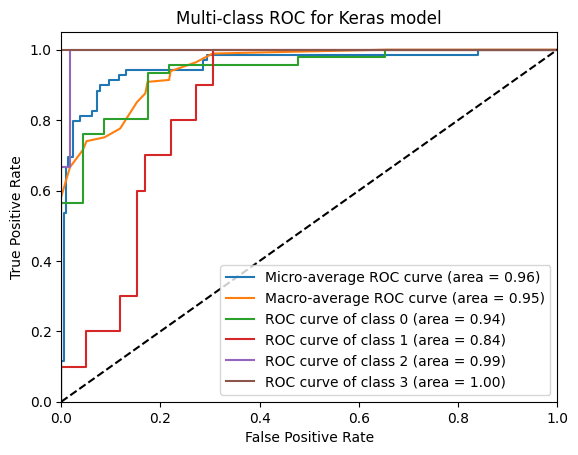

In [ ]:
# Assuming you have trained your model and have the predictions y_pred

# Binarize the output for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot(fpr["macro"], tpr["macro"], label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Keras model')
plt.legend(loc="lower right")
plt.show()


### Different train test split ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
for ratio in split_ratio:
  # Start timing
  start_time = time.time()
  print(f"The split ratio is: {ratio}:")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=38, stratify=y)

  smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  model = build_model(num_classes)

  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Define the early stopping callback
  early_stopping = EarlyStopping(
      monitor='val_loss',  # Monitor the validation loss
      patience=20,         # Number of epochs with no improvement after which training will be stopped
      restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
  )

  var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

  # Standardization
  scaler = StandardScaler().fit(X_train[:, var_filter])
  X_train = scaler.transform(X_train[:, var_filter])
  X_test = scaler.transform(X_test[:, var_filter])

  history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

  y_pred = model.predict(X_test)
  y_pred_class = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_class)
  print(f'Accuracy: {accuracy * 100:.2f}%')

  # Calculate recall
  recall = recall_score(y_test, y_pred_class, average='weighted')
  print(f'Recall: {recall * 100:.2f}%')

  # Calculate precision
  precision = precision_score(y_test, y_pred_class, average='weighted')
  print(f'Precision: {precision * 100:.2f}%')

  # Calculate F1 score
  f1 = f1_score(y_test, y_pred_class, average='weighted')
  print(f'F1 Score: {f1 * 100:.2f}%')

  # End timing
  end_time = time.time()
  # Calculate and print the elapsed time
  elapsed_time = end_time - start_time
  print(f"Total elapsed time: {elapsed_time} seconds")


  # Binarize the labels for AUC calculation
  y_test_binarized = label_binarize(y_test, classes=np.unique(y))

  # Calculate AUC for each class and average
  auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')
  print(f"AUC for split ratio {ratio}: {auc_score}")

  avg_acc.append(accuracy)
  avg_f1.append(f1)
  avg_pre.append(precision)
  avg_time.append(elapsed_time)
  avg_auc.append(auc_score)

The split ratio is: 0.1:
2/2 [==============================] - 0s 4ms/step
Accuracy: 80.00%
Recall: 80.00%
Precision: 82.26%
F1 Score: 79.81%
Total elapsed time: 19.45491313934326 seconds
AUC for split ratio 0.1: 0.9299805244436605
The split ratio is: 0.15:
2/2 [==============================] - 0s 5ms/step
Accuracy: 61.54%
Recall: 61.54%
Precision: 60.29%
F1 Score: 59.87%
Total elapsed time: 18.32553744316101 seconds
AUC for split ratio 0.15: 0.7976288405601846
The split ratio is: 0.2:
3/3 [==============================] - 0s 3ms/step
Accuracy: 68.12%
Recall: 68.12%
Precision: 82.47%
F1 Score: 71.61%
Total elapsed time: 17.842007398605347 seconds
AUC for split ratio 0.2: 0.8250343563269885
The split ratio is: 0.25:
3/3 [==============================] - 0s 3ms/step
Accuracy: 79.07%
Recall: 79.07%
Precision: 84.54%
F1 Score: 79.99%
Total elapsed time: 17.316502332687378 seconds
AUC for split ratio 0.25: 0.8559764548606859
The split ratio is: 0.3:
4/4 [==============================] 

In [ ]:
# Print the average metrics
print(f'Average Accuracy: {np.mean(avg_acc)}')
print(f'Average F1 Score: {np.mean(avg_f1)}')
print(f'Average Precision: {np.mean(avg_pre)}')
print(f'Average Computing time: {np.mean(avg_time)}')
print(f'Average AUC: {np.mean(avg_auc)}')

Average Accuracy: 0.6182250410477412
Average F1 Score: 0.606362356613187
Average Precision: 0.7626425184669868
Average Computing time: 16.398652648925783
Average AUC: 0.8240834476501332


### Feature selection

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1).values
y = Coadread_cancer_no_na['Subtype'].values
genes = Coadread_cancer_no_na.iloc[:, :-1].columns.to_numpy()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
print(Coadread_cancer_no_na.shape)

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}
(341, 17508)


In [ ]:
batch_size = 16
epoch_num = 100

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38, stratify=y)

# smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
# X_train, y_train = smote.fit_resample(X_train, y_train)

model = build_model(num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=20,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# Standardization
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

history = model.fit(X, y,
                    epochs=epoch_num,
                    batch_size=batch_size,
                    validation_split = 0.1,
                    callbacks=[early_stopping],
                    verbose = 1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 508ms/step - accuracy: 0.3520 - loss: 63441.6211 - val_accuracy: 0.6857 - val_loss: 12461.2178
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4574 - loss: 54109.8477 - val_accuracy: 0.6857 - val_loss: 5866.8960
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4763 - loss: 20789.6738 - val_accuracy: 0.6857 - val_loss: 2799.2107
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4795 - loss: 12329.9893 - val_accuracy: 0.6857 - val_loss: 1358.5095
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4947 - loss: 5958.8242 - val_accuracy: 0.2571 - val_loss: 654.6098
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4684 - loss: 3847.6733 - val_accuracy: 0.6857 - val_loss: 405.5660
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4494 - loss: 2508.2844 - val_accuracy: 0.6286 - val_loss: 153.6475
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accu

In [ ]:
import tensorflow as tf

def integrated_gradients(model, baseline, inputs, steps=50):
    # Generate the interpolated inputs between baseline and input
    interpolated_inputs = [baseline + (step / steps) * (inputs - baseline) for step in range(steps + 1)]
    interpolated_inputs = tf.convert_to_tensor(interpolated_inputs)

    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        predictions = model(interpolated_inputs)

    gradients = tape.gradient(predictions, interpolated_inputs)
    avg_gradients = tf.reduce_mean(gradients, axis=0)
    integrated_gradients = (inputs - baseline) * avg_gradients
    return integrated_gradients

# Set a baseline (can be a zero vector)
baseline = np.zeros(X_train.shape[1])

# Compute Integrated Gradients for a sample
ig = integrated_gradients(model, baseline, X[:100])
ig_sum = tf.reduce_mean(ig, axis=0)
top_20_indices = np.argsort(ig_sum)[-20:]
top_20_genes = retained_features[top_20_indices]


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[3.6170200e-01 3.1527999e-01 2.8880000e+00 ... 1.2518380e+02
   2.7166401e+01 1.5967120e+01]
  [8.8629998e-02 8.5533999e-02 2.8532200e+00 ... 9.3062401e+01
   2.4402599e+01 6.6763401e+00]
  [1.9799000e-01 2.2606400e-01 2.8639801e+00 ... 8.9212196e+01
   6.0040199e+01 1.0601360e+01]
  ...
  [2.3981200e-01 1.8338600e-01 5.4545398e+00 ... 8.2570602e+01
   3.1269600e+01 1.7029779e+01]
  [2.4886400e-01 1.1275000e-01 4.8090801e+00 ... 9.6142799e+01
   3.0802000e+01 1.5762640e+01]
  [1.7007600e-01 1.5892001e-02 5.5468202e+00 ... 5.9780201e+01
   4.2028801e+01 1.6534241e+01]]

 [[7.2340399e-01 6.3055998e-01 5.7760000e+00 ... 2.5036760e+02
   5.4332802e+01 3.1934240e+01]
  [1.7726000e-01 1.7106800e-01 5.7064400e+00 ... 1.8612480e+02
   4.8805199e+01 1.3352680e+01]
  [3.9598000e-01 4.5212799e-01 5.7279601e+00 ... 1.7842439e+02
   1.2008040e+02 2.1202721e+01]
  ...
  [4.7962400e-01 3.6677200e-01 1.0909080e+01 ... 1.6514120e+02
   6.2539200e+01 3.4059559e+01]
  [4.9772799e-01 2.2550000e-01 9.6181602e+00 ... 1.9228560e+02
   6.1604000e+01 3.1525280e+01]
  [3.4015200e-01 3.1784002e-02 1.1093640e+01 ... 1.1956040e+02
   8.4057602e+01 3.3068481e+01]]

 ...

 [[1.7361696e+01 1.5133440e+01 1.3862399e+02 ... 6.0088223e+03
   1.3039872e+03 7.6642175e+02]
  [4.2542400e+00 4.1056318e+00 1.3695456e+02 ... 4.4669951e+03
   1.1713248e+03 3.2046432e+02]
  [9.5035200e+00 1.0851072e+01 1.3747104e+02 ... 4.2821855e+03
   2.8819297e+03 5.0886526e+02]
  ...
  [1.1510976e+01 8.8025284e+00 2.6181793e+02 ... 3.9633889e+03
   1.5009408e+03 8.1742944e+02]
  [1.1945472e+01 5.4120002e+00 2.3083585e+02 ... 4.6148545e+03
   1.4784960e+03 7.5660675e+02]
  [8.1636477e+00 7.6281601e-01 2.6624734e+02 ... 2.8694497e+03
   2.0173824e+03 7.9364349e+02]]

 [[1.7723398e+01 1.5448720e+01 1.4151199e+02 ... 6.1340063e+03
   1.3311536e+03 7.8238885e+02]
  [4.3428702e+00 4.1911659e+00 1.3980779e+02 ... 4.5600576e+03
   1.1957274e+03 3.2714066e+02]
  [9.7015104e+00 1.1077136e+01 1.4033502e+02 ... 4.3713979e+03
   2.9419697e+03 5.1946661e+02]
  ...
  [1.1750788e+01 8.9859142e+00 2.6727246e+02 ... 4.0459595e+03
   1.5322104e+03 8.3445923e+02]
  [1.2194336e+01 5.5247502e+00 2.3564491e+02 ... 4.7109971e+03
   1.5092980e+03 7.7236938e+02]
  [8.3337240e+00 7.7870798e-01 2.7179419e+02 ... 2.9292297e+03
   2.0594111e+03 8.1017773e+02]]

 [[1.8085100e+01 1.5764000e+01 1.4439999e+02 ... 6.2591899e+03
   1.3583199e+03 7.9835602e+02]
  [4.4315000e+00 4.2767000e+00 1.4266100e+02 ... 4.6531201e+03
   1.2201300e+03 3.3381699e+02]
  [9.8994999e+00 1.1303200e+01 1.4319901e+02 ... 4.4606099e+03
   3.0020100e+03 5.3006799e+02]
  ...
  [1.1990600e+01 9.1693001e+00 2.7272699e+02 ... 4.1285298e+03
   1.5634800e+03 8.5148901e+02]
  [1.2443200e+01 5.6374998e+00 2.4045399e+02 ... 4.8071401e+03
   1.5401000e+03 7.8813202e+02]
  [8.5038004e+00 7.9460001e-01 2.7734100e+02 ... 2.9890100e+03
   2.1014399e+03 8.2671198e+02]]]. Expected shape (None, 17507), but input has incompatible shape (51, 100, 17507)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(51, 100, 17507), dtype=float32)
  • training=None
  • mask=None

In [ ]:
import tensorflow as tf
import numpy as np

retained_features = np.array(genes)

def integrated_gradients(model, baseline, inputs, steps=50):
    # Ensure inputs are correctly shaped (batch_size, num_features)
    inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
    baseline = tf.convert_to_tensor(baseline, dtype=tf.float32)

    # Generate the interpolated inputs between baseline and input
    interpolated_inputs = [(baseline + (step / steps) * (inputs - baseline)) for step in range(steps + 1)]

    # Stack interpolated inputs along the batch dimension
    interpolated_inputs = tf.stack(interpolated_inputs)

    # Reshape to have (steps+1, batch_size, num_features) instead of (steps+1, batch_size, batch_size, num_features)
    interpolated_inputs = tf.reshape(interpolated_inputs, ((steps + 1) * inputs.shape[0], inputs.shape[1]))

    # Record the gradients
    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        predictions = model(interpolated_inputs)

    gradients = tape.gradient(predictions, interpolated_inputs)

    # Reshape gradients back to (steps+1, batch_size, num_features)
    gradients = tf.reshape(gradients, (steps + 1, inputs.shape[0], inputs.shape[1]))

    # Average the gradients across all steps
    avg_gradients = tf.reduce_mean(gradients, axis=0)

    # Multiply by the input difference to get integrated gradients
    integrated_gradients = (inputs - baseline) * avg_gradients
    return integrated_gradients

# Step 2: Define a baseline (a zero vector, representing absence of any feature)
baseline = np.zeros(X.shape[1])

# Step 3: Compute Integrated Gradients for a subset of samples
ig = integrated_gradients(model, baseline, X[:100], steps=50)

# Step 4: Aggregate the Integrated Gradients across samples and identify top features
ig_sum = tf.reduce_mean(ig, axis=0)

# Step 5: Get indices of the top 20 features with highest importance scores
top_20_indices = np.argsort(ig_sum)[-20:]

# Step 6: Extract the feature names from retained features
top_20_features = retained_features[top_20_indices]

# Step 7: Output the top 20 important features
print("Top 20 features:", top_20_features)


Top 20 features: ['6168' '388524' '3921' '60' '7117' '1938' '6141' '6217' '10399' '6201'
 '23521' '6176' '6208' '6175' '1048' '6227' '6193' '6132' '7178' '6194']


In [ ]:
print(top_20_genes)

['7468' '4552' '2661' '1796' '100009676' '51507' '23564' '153222' '124817'
 '23518' '645455' '10626' '221395' '552889' '8363' '80852' '9913' '10477'
 '389336' '283796']


### Training 5 times for each ratio


In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')

    avg_acc_s.append(accuracy_score(y_test, y_pred_class))
    avg_f1_s.append(f1_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.1:
Training seed 3:
2/2 [==============================] - 0s 4ms/step
Training seed 8:
2/2 [==============================] - 0s 5ms/step
Training seed 19:
2/2 [==============================] - 0s 5ms/step
Training seed 66:
2/2 [==============================] - 0s 4ms/step
Training seed 38:


2/2 [==============================] - 0s 4ms/step
Avreage accuracy: 0.6342857142857143
Avreage F1: 0.6317670504921662
Avreage precision: 0.7784723171565278
Avreage auc: 0.822929417644119
Avreage time: 19.760192823410033
The split ratio is: 0.15:
Training seed 3:


2/2 [==============================] - 0s 6ms/step
Training seed 8:
2/2 [==============================] - 0s 5ms/step
Training seed 19:
2/2 [==============================] - 0s 4ms/step
Training seed 66:
2/2 [==============================] - 0s 5ms/step
Training seed 38:
2/2 [==============================] - 0s 4ms/step
Avreage accuracy: 0.49230769230769234
Avreage F1: 0.4803607419124224
Avreage precision: 0.6000341798669557
Avreage auc: 0.6986769196755516
Avreage time: 17.688767004013062
The split ratio is: 0.2:
Training seed 3:
3/3 [==============================] - 0s 3ms/step
Training seed 8:
3/3 [==============================] - 0s 4ms/step
Training seed 19:
3/3 [==============================] - 0s 3ms/step
Training seed 66:
3/3 [==============================] - 0s 3ms/step
Training seed 38:
3/3 [==============================] - 0s 3ms/step
Avreage accuracy: 0.4869565217391304
Avreage F1: 0.514412814203679
Avreage precision: 0.6147194724371157
Avreage auc: 0.64907808809170

### Other ratios

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    if ratio <= 0.4:
      neighbors = 3
    elif ratio == 0.5:
      neighbors = 2
    else:
      neighbors = 1

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=neighbors, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')

    avg_acc_s.append(accuracy_score(y_test, y_pred_class))
    avg_f1_s.append(f1_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.3:
Training seed 3:
4/4 [==============================] - 0s 3ms/step
Training seed 8:
4/4 [==============================] - 0s 3ms/step
Training seed 19:
4/4 [==============================] - 0s 3ms/step
Training seed 66:
4/4 [==============================] - 0s 3ms/step
Training seed 38:
4/4 [==============================] - 0s 3ms/step
Avreage accuracy: 0.5456310679611651
Avreage F1: 0.5864505236547315
Avreage precision: 0.7545882005824416
Avreage auc: 0.7027601783287573
Avreage time: 16.365902423858643
The split ratio is: 0.4:
Training seed 3:
5/5 [==============================] - 0s 3ms/step
Training seed 8:
5/5 [==============================] - 0s 3ms/step
Training seed 19:
5/5 [==============================] - 0s 3ms/step
Training seed 66:
5/5 [==============================] - 0s 3ms/step
Training seed 38:
5/5 [==============================] - 0s 3ms/step
Avreage accuracy: 0.5649635036496351
Avreage F1: 0.5969717053176946
Avreage precision: 0.6942

## LightGBM

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1)
y = Coadread_cancer_no_na['Subtype']

X = X.to_numpy()
y = y.tolist()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
Coadread_cancer_no_na.shape

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}


(341, 17496)

In [ ]:
import lightgbm as lgb
# tell LightGBM to use the NVIDIA OpenCL installable client driver (ICD)
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Cross Validation

In [ ]:
random_state = 38
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Lists to store metrics for each fold
accuracies_gbm = []
f1_scores_gbm = []
precisions_gbm = []
recalls_gbm = []
confusion_matrices_gbm = []
kappas_gbm = []
hamming_distances_gbm = []

for train_index, test_index in kf.split(X_train_temp):
    X_train, X_val = X_train_temp[train_index], X_train_temp[test_index]
    y_train, y_val = y_train_temp[train_index], y_train_temp[test_index]

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train[:, var_filter])

    X_train = scaler.transform(X_train[:, var_filter])
    X_val = scaler.transform(X_val[:, var_filter])


    train_data = lgb.Dataset(X_train, label=y_train)

    # Define the parameters for LightGBM
    params = {
        'device_type': 'gpu',
        'objective': 'multiclass',
        'num_class': len(np.unique(y)),
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting_type': 'gbdt',
        'num_leaves': 50,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0,
        'random_state': random_state
    }
    # Train the model
    num_round = 10
    lgbm_model = lgb.train(params, train_data, num_round)
    # Predict on the test set
    y_pred = lgbm_model.predict(X_val)
    # Convert the probabilities into class predictions
    y_pred_class = np.argmax(y_pred, axis=1)
    # Calculate metrics
    accuracies_gbm.append(accuracy_score(y_val, y_pred_class))
    f1_scores_gbm.append(f1_score(y_val, y_pred_class, average='weighted'))
    precisions_gbm.append(precision_score(y_val, y_pred_class, average='weighted'))
    recalls_gbm.append(recall_score(y_val, y_pred_class, average='weighted'))

In [ ]:
print(f'Average Accuracy: {np.mean(accuracies_gbm)}')
print(f'Average F1 Score: {np.mean(f1_scores_gbm)}')
print(f'Average Precision: {np.mean(precisions_gbm)}')
print(f'Average Recall: {np.mean(recalls_gbm)}')

Average Accuracy: 0.7646551724137931
Average F1 Score: 0.6938151249246778
Average Precision: 0.7122530560116768
Average Recall: 0.7646551724137931


### Test Accuracy

In [ ]:
start_time = time.time()
random_state = 38
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train = smote.fit_resample(X_train, y_train)

var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# Standardization
scaler = StandardScaler().fit(X_train[:, var_filter])

X_train = scaler.transform(X_train[:, var_filter])
X_test = scaler.transform(X_test[:, var_filter])


train_data = lgb.Dataset(X_train, label=y_train)

# Define the parameters for LightGBM
params = {
    #'device_type': 'gpu',
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': random_state
}
# Train the model
num_round = 10
lgbm_model = lgb.train(params, train_data, num_round)
# Predict on the test set
y_pred = lgbm_model.predict(X_test)
# Convert the probabilities into class predictions
y_pred_class = np.argmax(y_pred, axis=1)
# Calculate metrics

print(f"The test accuracy was {accuracy_score(y_pred_class, y_test):.3f}")
print(f"F1 Score: {f1_score(y_pred_class, y_test, average='weighted', zero_division=0)}")
print(f"Precision: {f1_score(y_pred_class, y_test, average='weighted', zero_division=0)}")

# End timing
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time_1 = end_time - start_time
print(f"Elapsed time: {elapsed_time_1} seconds")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

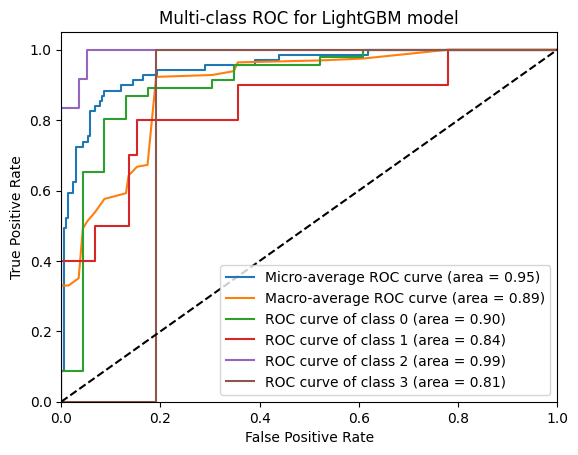

In [ ]:
# Assuming you have already split your data, standardized it, and trained your model

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot(fpr["macro"], tpr["macro"], label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for LightGBM model')
plt.legend(loc="lower right")
plt.show()


### Different train test split ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
for ratio in split_ratio:
  # Start timing
  start_time = time.time()
  print(f"The split ratio is {ratio}:")

  random_state = 38
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=random_state, stratify=y)

  smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

  # Standardization
  scaler = StandardScaler().fit(X_train[:, var_filter])

  X_train = scaler.transform(X_train[:, var_filter])
  X_test = scaler.transform(X_test[:, var_filter])


  train_data = lgb.Dataset(X_train, label=y_train)

  # Define the parameters for LightGBM
  params = {
      #'device_type': 'gpu',
      'objective': 'multiclass',
      'num_class': len(np.unique(y)),
      'metric': 'multi_logloss',
      'is_unbalance': 'true',
      'boosting_type': 'gbdt',
      'num_leaves': 50,
      'learning_rate': 0.05,
      'feature_fraction': 0.9,
      'bagging_fraction': 0.8,
      'bagging_freq': 5,
      'verbose': 0,
      'random_state': random_state
  }
  # Train the model
  num_round = 10
  lgbm_model = lgb.train(params, train_data, num_round)
  # Predict on the test set
  y_pred = lgbm_model.predict(X_test)
  # Convert the probabilities into class predictions
  y_pred_class = np.argmax(y_pred, axis=1)
  # Calculate metrics

  print(f"The test accuracy was {accuracy_score(y_pred_class, y_test):.3f}")
  print(f"F1 Score: {f1_score(y_pred_class, y_test, average='weighted', zero_division=0)}")
  print(f"Precision: {precision_score(y_pred_class, y_test, average='weighted', zero_division=0)}")

  # End timing
  end_time = time.time()
  # Calculate and print the elapsed time
  elapsed_time = end_time - start_time
  print(f"Total elapsed time: {elapsed_time} seconds")


  # Binarize the labels for AUC calculation
  y_test_binarized = label_binarize(y_test, classes=np.unique(y))

  # Calculate AUC for each class and average
  auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')
  print(f"AUC for split ratio {ratio}: {auc_score}")

  avg_acc.append(accuracy_score(y_pred_class, y_test))
  avg_f1.append(f1_score(y_pred_class, y_test, average='weighted', zero_division=0))
  avg_pre.append(precision_score(y_pred_class, y_test, average='weighted', zero_division=0))
  avg_time.append(elapsed_time)
  avg_auc.append(auc_score)


The split ratio is 0.1:
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
# Print the average metrics
print(f'Average Computing time: {np.mean(avg_time)}')
print(f'Average Accuracy: {np.mean(avg_acc)}')
print(f'Average F1 Score: {np.mean(avg_f1)}')
print(f'Average Precision: {np.mean(avg_pre)}')
print(f'Average AUC: {np.mean(avg_auc)}')

Average Computing time: 8.886084175109863
Average Accuracy: 0.8355514011284771
Average F1 Score: 0.838680878454403
Average Precision: 0.8507899431439305
Average AUC: 0.8896190104374604


### Feature selection

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1).values
y = Coadread_cancer_no_na['Subtype'].values
genes = Coadread_cancer_no_na.iloc[:, :-1].columns.to_numpy()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
print(Coadread_cancer_no_na.shape)

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}
(341, 17496)


In [ ]:
random_state = 38
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train = smote.fit_resample(X, y)

# var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')
retained_features = np.array(genes)

# Standardization
# scaler = StandardScaler().fit(X_train[:, var_filter])

# X_train = scaler.transform(X_train[:, var_filter])
# X_test = scaler.transform(X_test[:, var_filter])


train_data = lgb.Dataset(X_train, label=y_train)

# Define the parameters for LightGBM
params = {
    #'device_type': 'gpu',
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': random_state
}
# Train the model
num_round = 5
lgbm_model = lgb.train(params, train_data, num_round)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# Get feature importances from the LightGBM model
importances = lgbm_model.feature_importance(importance_type='split')

# Sort the feature indices based on importance
sorted_indices = np.argsort(importances)[::-1]

# Select the top 20 features
top_20_indices = sorted_indices[:20]

# Retrieve the gene names for the top 20 features
top_20_genes = retained_features[top_20_indices]

print(top_20_genes)

['100133144' '147525' '9189' '498' '129530' '93624' '10406' '10194'
 '50854' '7358' '6521' '27284' '64285' '92292' '51114' '7222' '143244'
 '10551' '2672' '440957']


### Training 5 times for each ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []
avg_aupr = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  avg_aupr_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    train_data = lgb.Dataset(X_train, label=y_train)
    # Define the parameters for LightGBM
    params = {
        #'device_type': 'gpu',
        'objective': 'multiclass',
        'num_class': len(np.unique(y)),
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting_type': 'gbdt',
        'num_leaves': 50,
        'learning_rate': 0.1,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0,
        'random_state': 38
    }
    # Train the model
    num_round = 5
    lgbm_model = lgb.train(params, train_data, num_round)
    # Predict on the test set
    y_pred = lgbm_model.predict(X_test)
    # Convert the probabilities into class predictions
    y_pred_class = np.argmax(y_pred, axis=1)
    # Calculate metrics

    #print(f"The test accuracy was {accuracy_score(y_pred_class, y_test):.3f}")
    #print(f"F1 Score: {f1_score(y_pred_class, y_test, average='weighted', zero_division=0)}")
    #print(f"Precision: {precision_score(y_pred_class, y_test, average='weighted', zero_division=0)}")

    # End timing
    end_time = time.time()

    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    #print(f"Elapsed time: {elapsed_time_1} seconds")

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))


    avg_acc_s.append(accuracy_score(y_pred_class, y_test))
    avg_f1_s.append(f1_score(y_pred_class, y_test, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_pred_class, y_test, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro'))
    avg_aupr_s.append(average_precision_score(y_test_binarized, y_pred, average='weighted'))

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage aupr: {np.mean(avg_aupr_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))


The split ratio is: 0.1:
Training seed 3:
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### other ratios

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    if ratio <= 0.4:
      neighbors = 3
    elif ratio == 0.5:
      neighbors = 2
    else:
      neighbors = 1

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=neighbors, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    #var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    train_data = lgb.Dataset(X_train, label=y_train)
    # Define the parameters for LightGBM
    params = {
        #'device_type': 'gpu',
        'objective': 'multiclass',
        'num_class': len(np.unique(y)),
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting_type': 'gbdt',
        'num_leaves': 50,
        'learning_rate': 0.1,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0,
        'random_state': 121
    }
    # Train the model
    num_round = 4
    lgbm_model = lgb.train(params, train_data, num_round)
    # Predict on the test set
    y_pred = lgbm_model.predict(X_test)
    # Convert the probabilities into class predictions
    y_pred_class = np.argmax(y_pred, axis=1)
    # Calculate metrics

    #print(f"The test accuracy was {accuracy_score(y_pred_class, y_test):.3f}")
    #print(f"F1 Score: {f1_score(y_pred_class, y_test, average='weighted', zero_division=0)}")
    #print(f"Precision: {precision_score(y_pred_class, y_test, average='weighted', zero_division=0)}")

    # End timing
    end_time = time.time()

    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    #print(f"Elapsed time: {elapsed_time_1} seconds")

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))


    avg_acc_s.append(accuracy_score(y_pred_class, y_test))
    avg_f1_s.append(f1_score(y_pred_class, y_test, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_pred_class, y_test, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro'))

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))


The split ratio is: 0.3:
Training seed 3:
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1)
y = Coadread_cancer_no_na['Subtype']

X = X.to_numpy()
y = y.tolist()

le = LabelEncoder()
y_enc = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y_enc).size
print(le_mapping )
Coadread_cancer_no_na.shape

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}


(341, 17496)

### Cross Validation

In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y_enc, test_size=0.15, random_state=38, stratify=y_enc)
print(X_train_temp.shape)
print(X_test.shape)

random_state = 38
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Lists to store metrics for each fold
fold_no = 1
accuracies = []
f1_scores = []
precisions = []
recalls = []
confusion_matrices = []
kappas = []
hamming_distances = []


for train_index, test_index in kf.split(X_train_temp):
    print(f"Training for fold{fold_no}...")
    X_train, X_val = X_train_temp[train_index], X_train_temp[test_index]
    y_train, y_val = y_train_temp[train_index], y_train_temp[test_index]

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train[:, var_filter])

    X_train = scaler.transform(X_train[:, var_filter])
    X_val = scaler.transform(X_val[:, var_filter])

    clf= DecisionTreeClassifier(random_state = 38)
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_val)

     # Calculate metrics
    print(f"Accuracy: {accuracy_score(y_pred, y_val) * 100 :.3f}")
    accuracies.append(accuracy_score(y_pred, y_val))
    f1_scores.append(f1_score(y_pred, y_val, average='weighted', zero_division=0))
    precisions.append(precision_score(y_pred, y_val, average='weighted', zero_division=0))
    recalls.append(recall_score(y_pred, y_val, average='weighted', zero_division=0))

    fold_no += 1

(289, 17495)
(52, 17495)
Training for fold1...
Accuracy: 68.966
Training for fold2...
Accuracy: 82.759
Training for fold3...
Accuracy: 82.759
Training for fold4...
Accuracy: 68.966
Training for fold5...
Accuracy: 75.862
Training for fold6...
Accuracy: 82.759
Training for fold7...
Accuracy: 75.862
Training for fold8...
Accuracy: 79.310
Training for fold9...
Accuracy: 79.310
Training for fold10...
Accuracy: 71.429


In [ ]:
# After cross-validation, calculate the average of the metrics
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f1_scores)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average F1 Score: {avg_f1_score}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')

Average Accuracy: 0.7679802955665025
Average F1 Score: 0.7628081575975488
Average Precision: 0.7875736380600126
Average Recall: 0.7679802955665025


### Test Accuracy

In [ ]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=38, stratify=y_enc)

smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train = smote.fit_resample(X_train, y_train)
var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# Standardization
scaler = StandardScaler().fit(X_train[:, var_filter])

X_train = scaler.transform(X_train[:, var_filter])
X_test = scaler.transform(X_test[:, var_filter])

clf= DecisionTreeClassifier(random_state = 38)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

# Calculate metrics
print(f"Accuracy: {accuracy_score(y_pred, y_test) * 100 :.3f}")
print(f"F1 Score: {f1_score(y_pred, y_test, average='weighted', zero_division=0)}")
print(f"Precision: {f1_score(y_pred, y_test, average='weighted', zero_division=0)}")

# End timing
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time_1 = end_time - start_time
print(f"Elapsed time: {elapsed_time_1} seconds")

Accuracy: 79.710
F1 Score: 0.7951884341170888
Precision: 0.7951884341170888
Elapsed time: 5.500518560409546 seconds


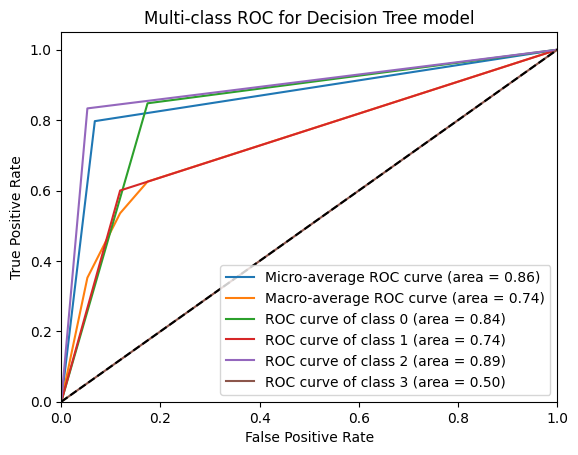

In [ ]:
# Your existing code for training the Decision Tree Classifier

# Predict probability scores
y_prob = clf.predict_proba(X_test)

# Binarize the output for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot(fpr["macro"], tpr["macro"], label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Decision Tree model')
plt.legend(loc="lower right")
plt.show()

### different train test split ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
for ratio in split_ratio:
  # Start timing
  start_time = time.time()
  print(f"The split ratio is {ratio}:")

  X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=ratio, random_state=38, stratify=y_enc)

  smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

  # Standardization
  scaler = StandardScaler().fit(X_train[:, var_filter])

  X_train = scaler.transform(X_train[:, var_filter])
  X_test = scaler.transform(X_test[:, var_filter])

  clf= DecisionTreeClassifier(random_state = 38)
  clf.fit(X_train,y_train)
  y_pred= clf.predict(X_test)

    # Calculate metrics
  print(f"Accuracy: {accuracy_score(y_pred, y_test) * 100 :.3f}")
  print(f"F1 Score: {f1_score(y_pred, y_test, average='weighted', zero_division=0)}")
  print(f"Precision: {f1_score(y_pred, y_test, average='weighted', zero_division=0)}")

  # End timing
  end_time = time.time()
  # Calculate and print the elapsed time
  elapsed_time = end_time - start_time
  print(f"Total elapsed time: {elapsed_time} seconds")


  # Get the probability estimates
  y_pred_proba = clf.predict_proba(X_test)

  # Binarize the labels for AUC calculation
  y_test_binarized = label_binarize(y_test, classes=np.unique(y_enc))

  # Calculate AUC for each class and average
  auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
  print(f"AUC for split ratio {ratio}: {auc_score}")

  avg_acc.append(accuracy_score(y_pred, y_test))
  avg_f1.append(f1_score(y_pred, y_test, average='weighted', zero_division=0))
  avg_pre.append(precision_score(y_pred, y_test, average='weighted', zero_division=0))
  avg_time.append(elapsed_time)
  avg_auc.append(auc_score)

The split ratio is 0.1:
Accuracy: 68.571
F1 Score: 0.694667035092567
Precision: 0.694667035092567
Total elapsed time: 5.706459045410156 seconds
AUC for split ratio 0.1: 0.638390179910045
The split ratio is 0.15:
Accuracy: 67.308
F1 Score: 0.6715331452173559
Precision: 0.6715331452173559
Total elapsed time: 4.880293130874634 seconds
AUC for split ratio 0.15: 0.6542856748055106
The split ratio is 0.2:
Accuracy: 73.913
F1 Score: 0.7380993297817493
Precision: 0.7380993297817493
Total elapsed time: 4.61444878578186 seconds
AUC for split ratio 0.2: 0.6866549664507622
The split ratio is 0.25:
Accuracy: 70.930
F1 Score: 0.6984354398431367
Precision: 0.6984354398431367
Total elapsed time: 4.379716634750366 seconds
AUC for split ratio 0.25: 0.6703964403398531
The split ratio is 0.3:
Accuracy: 75.728
F1 Score: 0.7558190197714156
Precision: 0.7558190197714156
Total elapsed time: 4.181758403778076 seconds
AUC for split ratio 0.3: 0.704557724680031


In [ ]:
# Print the average metrics
print(f'Average Computing time: {np.mean(avg_time)}')
print(f'Average Accuracy: {np.mean(avg_acc)}')
print(f'Average F1 Score: {np.mean(avg_f1)}')
print(f'Average Precision: {np.mean(avg_pre)}')
print(f'Average AUC: {np.mean(avg_auc)}')

Average Computing time: 4.752535200119018
Average Accuracy: 0.7129011045106542
Average F1 Score: 0.7117107939412449
Average Precision: 0.7162586389301696
Average AUC: 0.6708569972372403


### Feature selection

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1).values
y = Coadread_cancer_no_na['Subtype'].values
genes = Coadread_cancer_no_na.iloc[:, :-1].columns.to_numpy()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
print(Coadread_cancer_no_na.shape)

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}
(341, 17508)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=38, stratify=y_enc)

# smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
X_train, y_train = smote.fit_resample(X, y)
var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# # Standardization
# scaler = StandardScaler().fit(X_train[:, var_filter])

# X_train = scaler.transform(X_train[:, var_filter])
# X_test = scaler.transform(X_test[:, var_filter])

clf= DecisionTreeClassifier(random_state = 38,
                                criterion = 'gini',
                                max_depth =  20,
                                max_features = 'sqrt',
                                min_samples_leaf = 2,
                                min_samples_split = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       random_state=38)

In [ ]:
# Get feature importances from the decision tree model
importances = clf.feature_importances_

# Sort the importances and get the indices of the top 20
top_20_indices = np.argsort(importances)[-20:]

# Map these indices to the corresponding gene names in retained_features
top_20_genes = retained_features[top_20_indices]

top_20_genes

array(['6302', '221908', '1300', '84193', '1299', '9513', '138307',
       '150962', '54460', '60492', '4055', '57168', '2395', '27094',
       '55384', '5473', '9478', '55904', '348093', '2908'], dtype=object)

### Training 5 times for each ratio

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=ratio, random_state=seed, stratify=y_enc)

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    #var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf= DecisionTreeClassifier(random_state = 38,
                                criterion = 'gini',
                                max_depth =  20,
                                max_features = 'sqrt',
                                min_samples_leaf = 2,
                                min_samples_split = 2)
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)

    # Calculate metrics
    # print(f"Accuracy: {accuracy_score(y_pred, y_test) * 100 :.3f}")
    # print(f"F1 Score: {f1_score(y_pred, y_test, average='weighted', zero_division=0)}")
    # print(f"Precision: {precision_score(y_pred, y_test, average='weighted', zero_division=0)}")

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    #print(f"Total elapsed time: {elapsed_time} seconds")

    # Get the probability estimates
    y_pred_proba = clf.predict_proba(X_test)

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_enc))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
    # print(f"AUC for split ratio {ratio}: {auc_score}")

    avg_acc_s.append(accuracy_score(y_pred, y_test))
    avg_f1_s.append(f1_score(y_pred, y_test, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_pred, y_test, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.1:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.6057142857142856
Avreage F1: 0.5984145850771989
Avreage precision: 0.6090020703933747
Avreage auc: 0.6408964782314724
Avreage time: 0.87173490524292
The split ratio is: 0.15:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.7538461538461539
Avreage F1: 0.7589038522205758
Avreage precision: 0.7813097033685269
Avreage auc: 0.7108263724799293
Avreage time: 0.9040966510772706
The split ratio is: 0.2:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.6579710144927536
Avreage F1: 0.652072768681561
Avreage precision: 0.6604242806133166
Avreage auc: 0.6333823582729079
Avreage time: 0.8321285724639893
The split ratio is: 0.25:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.6023255813953489

### Other Ratios

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=ratio, random_state=seed, stratify=y_enc)

    if ratio <= 0.4:
      neighbors = 3
    elif ratio == 0.5:
      neighbors = 2
    else:
      neighbors = 1

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=neighbors, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    #var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf= DecisionTreeClassifier(random_state = 38,
                                criterion = 'gini',
                                max_depth =  20,
                                max_features = 'sqrt',
                                min_samples_leaf = 2,
                                min_samples_split = 2)
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)

    # Calculate metrics
    # print(f"Accuracy: {accuracy_score(y_pred, y_test) * 100 :.3f}")
    # print(f"F1 Score: {f1_score(y_pred, y_test, average='weighted', zero_division=0)}")
    # print(f"Precision: {precision_score(y_pred, y_test, average='weighted', zero_division=0)}")

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    #print(f"Total elapsed time: {elapsed_time} seconds")

    # Get the probability estimates
    y_pred_proba = clf.predict_proba(X_test)

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_enc))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
    # print(f"AUC for split ratio {ratio}: {auc_score}")

    avg_acc_s.append(accuracy_score(y_pred, y_test))
    avg_f1_s.append(f1_score(y_pred, y_test, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_pred, y_test, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.3:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.6815533980582524
Avreage F1: 0.682162895077487
Avreage precision: 0.6867897709245511
Avreage auc: 0.6446493204992768
Avreage time: 0.7950474739074707
The split ratio is: 0.4:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.6291970802919707
Avreage F1: 0.6235961731267249
Avreage precision: 0.6278586134060586
Avreage auc: 0.6229790000552793
Avreage time: 0.7485759258270264
The split ratio is: 0.5:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.67953216374269
Avreage F1: 0.6796584062377512
Avreage precision: 0.682929427797616
Avreage auc: 0.6421020238752521
Avreage time: 0.6995429515838623
The split ratio is: 0.6:
Training seed 3:
Training seed 8:
Training seed 19:
Training seed 66:
Training seed 38:
Avreage accuracy: 0.6478048780487805
Av

## DCGN

In [ ]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_zscore_normal_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1)
y = Coadread_cancer_no_na['Subtype']

X = X.to_numpy()
y = y.tolist()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
Coadread_cancer_no_na.shape

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}


(341, 17496)

In [ ]:
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Reshape, Bidirectional, GRU, Flatten, Dropout

In [ ]:
# Define gelu activation function
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

In [ ]:
def build_model(num_classes):
    model = Sequential([
    Dense(1024,
          activation=gelu,
          kernel_regularizer=regularizers.l2()),

    Reshape((32, 32, 1)),

    Conv2D(filters=128, kernel_size=3, padding='same', strides=2, activation=gelu),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Reshape((128, 64)),

    Bidirectional(
        GRU(64, return_sequences=True,
            bias_regularizer=regularizers.l2(1e-4),
            activity_regularizer=regularizers.l2(1e-5))
    ),

    Reshape((128, 128, 1)),

    Conv2D(filters=64, kernel_size=3, padding='same', strides=2, activation=gelu),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Flatten(),

    Dense(128, activation=gelu, kernel_regularizer=regularizers.l2()),
    Dense(64, activation=gelu, kernel_regularizer=regularizers.l2()),
    Dropout(rate=0.6),
    Dense(32, activation=gelu, kernel_regularizer=regularizers.l2()),
    Dropout(rate=0.7),

    Dense(4, activation= 'softmax')
    ])
    return model

### Without Smote

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    # smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')

    avg_acc_s.append(accuracy_score(y_test, y_pred_class))
    avg_f1_s.append(f1_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.1:
Training seed 3:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
Training seed 8:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
Training seed 19:


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
Training seed 66:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
Training seed 38:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step
Avreage accuracy: 0.8400000000000001
Avreage F1: 0.8291315154667304
Avreage precision: 0.8295081109366824
Avreage auc: 0.9040570156098422
Avreage time: 36.09175615310669
The split ratio is: 0.15:
Training seed 3:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step
Training seed 8:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
Training seed 19:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
Training seed 66:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
Training seed 38:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
Avreage accuracy: 0.8346153846153846
Avreage F1: 0.807053433702888
Avreage precision: 0.8119033076163806
Avreage auc: 0.9091391859774213
Avreage time: 25.823860788345335
The split ratio is: 0.2:
Training seed 3:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
Training seed 8:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
Training seed 19:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step
Trai

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    if ratio <= 0.4:
      neighbors = 3
    elif ratio == 0.5:
      neighbors = 2
    else:
      neighbors = 1

    # smote = SMOTE(sampling_strategy= 'auto', k_neighbors=neighbors, random_state=38)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')

    avg_acc_s.append(accuracy_score(y_test, y_pred_class))
    avg_f1_s.append(f1_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.3:
Training seed 3:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Training seed 8:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Training seed 19:


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Training seed 66:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
Training seed 38:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
Avreage accuracy: 0.8291262135922329
Avreage F1: 0.8181844163524759
Avreage precision: 0.8176322835735352
Avreage auc: 0.8790342185479052
Avreage time: 28.41731538772583
The split ratio is: 0.4:
Training seed 3:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Training seed 8:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Training seed 19:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Training seed 66:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Training seed 38:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Avreage accuracy: 0.802919708029197
Avreage F1: 0.7692528013365332
Avreage precision: 0.7521917440681698
Avreage auc: 0.891461956541314
Avreage time: 19.90047950744629
The split ratio is: 0.5:
Training seed 3:
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Training seed 8:
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Training seed 19:
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Training seed 66:


### With Smote

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.1, 0.15, 0.2, 0.25, 0.3]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=3, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')

    avg_acc_s.append(accuracy_score(y_test, y_pred_class))
    avg_f1_s.append(f1_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.1:
Training seed 3:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step
Training seed 8:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
Training seed 19:


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
Training seed 66:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
Training seed 38:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step
Avreage accuracy: 0.8114285714285714
Avreage F1: 0.8058471977352305
Avreage precision: 0.8118296064837416
Avreage auc: 0.9104842284739982
Avreage time: 48.25420093536377
The split ratio is: 0.15:
Training seed 3:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step
Training seed 8:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
Training seed 19:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
Training seed 66:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
Training seed 38:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
Avreage accuracy: 0.85
Avreage F1: 0.8392559863843966
Avreage precision: 0.8330743668724437
Avreage auc: 0.9217825700576213
Avreage time: 62.144011449813846
The split ratio is: 0.2:
Training seed 3:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
Training seed 8:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
Training seed 19:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
Training seed 66:

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 4, n_samples_fit = 3, n_samples = 3

In [ ]:
avg_acc = []
avg_f1 = []
avg_pre = []
avg_time = []
avg_auc = []

split_ratio = [0.3, 0.4, 0.5, 0.6, 0.7]
seeds = [3, 8, 19, 66, 38]
for ratio in split_ratio:
  print(f"The split ratio is: {ratio}:")
  avg_acc_s = []
  avg_f1_s = []
  avg_pre_s = []
  avg_time_s = []
  avg_auc_s = []
  for seed in seeds:
    # Start timing
    start_time = time.time()

    print(f"Training seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed, stratify=y)

    if ratio <= 0.4:
      neighbors = 3
    elif ratio == 0.5:
      neighbors = 2
    else:
      neighbors = 1

    smote = SMOTE(sampling_strategy= 'auto', k_neighbors=neighbors, random_state=38)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

    # Standardization
    scaler = StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = build_model(num_classes)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=20,         # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split = 0.1,
                      callbacks=[early_stopping],
                      verbose = 0)

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # End timing
    end_time = time.time()
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    # Binarize the labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    # Calculate AUC for each class and average
    auc_score = roc_auc_score(y_test_binarized, y_pred, multi_class='ovr', average='macro')

    avg_acc_s.append(accuracy_score(y_test, y_pred_class))
    avg_f1_s.append(f1_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_pre_s.append(precision_score(y_test, y_pred_class, average='weighted', zero_division=0))
    avg_time_s.append(elapsed_time)
    avg_auc_s.append(auc_score)

  print(f"Avreage accuracy: {np.mean(avg_acc_s)}")
  print(f"Avreage F1: {np.mean(avg_f1_s)}")
  print(f"Avreage precision: {np.mean(avg_pre_s)}")
  print(f"Avreage auc: {np.mean(avg_auc_s)}")
  print(f"Avreage time: {np.mean(avg_time_s)}")

  avg_acc.append(np.mean(avg_acc_s))
  avg_f1.append(np.mean(avg_f1_s))
  avg_pre.append(np.mean(avg_pre_s))
  avg_time.append(np.mean(avg_time_s))
  avg_auc.append(np.mean(avg_auc_s))

The split ratio is: 0.3:
Training seed 3:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Training seed 8:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Training seed 19:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Training seed 66:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Training seed 38:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Avreage accuracy: 0.8349514563106796
Avreage F1: 0.8272719392413697
Avreage precision: 0.8237134424035444
Avreage auc: 0.8805474964513257
Avreage time: 40.62906723022461
The split ratio is: 0.4:
Training seed 3:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Training seed 8:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Training seed 19:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Training seed 66:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Training seed 38:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Avreage accuracy: 0.8350364963503649
Avreage F1: 0.8294392169021492
Avreage precision: 0.8314021481676253
Avreage auc: 0.8989247502209219
Avreage time: 43.259907245635986
The split ratio is: 0.5:
Training seed 3:
6/6 ━━━━━━━

### Feature Selection

In [3]:
Coadread_cancer = pd.read_csv('/content/drive/MyDrive/Graduation_Project/data/coadread_cancer/coadread_cancer_subtype_data_withGeneID.csv')

Coadread_cancer_no_na = Coadread_cancer.dropna(subset = ['Subtype'])

Coadread_cancer_no_na = Coadread_cancer_no_na.dropna(axis = 1)
Coadread_cancer_no_na.shape
Coadread_cancer_no_na = Coadread_cancer_no_na[~Coadread_cancer_no_na['Subtype'].isin(['READ_CIN', 'READ_GS', 'READ_MSI', 'READ_POLE'])]

X = Coadread_cancer_no_na.drop(['Subtype'], axis=1).values
y = Coadread_cancer_no_na['Subtype'].values
genes = Coadread_cancer_no_na.iloc[:, :-1].columns.to_numpy()

le = LabelEncoder()
y = le.fit_transform(y)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y).size
print(le_mapping )
print(Coadread_cancer_no_na.shape)

{0: 'COAD_CIN', 1: 'COAD_GS', 2: 'COAD_MSI', 3: 'COAD_POLE'}
(341, 17508)


In [4]:
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Reshape, Bidirectional, GRU, Flatten, Dropout

In [5]:
# Define gelu activation function
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

In [6]:
def build_model(num_classes):
    model = Sequential([
    Dense(1024,
          activation=gelu,
          kernel_regularizer=regularizers.l2()),

    Reshape((32, 32, 1)),

    Conv2D(filters=128, kernel_size=3, padding='same', strides=2, activation=gelu),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Reshape((128, 64)),

    Bidirectional(
        GRU(64, return_sequences=True,
            bias_regularizer=regularizers.l2(1e-4),
            activity_regularizer=regularizers.l2(1e-5))
    ),

    Reshape((128, 128, 1)),

    Conv2D(filters=64, kernel_size=3, padding='same', strides=2, activation=gelu),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Flatten(),

    Dense(128, activation=gelu, kernel_regularizer=regularizers.l2()),
    Dense(64, activation=gelu, kernel_regularizer=regularizers.l2()),
    Dropout(rate=0.6),
    Dense(32, activation=gelu, kernel_regularizer=regularizers.l2()),
    Dropout(rate=0.7),

    Dense(5, activation= 'softmax')
    ])
    return model

In [7]:
batch_size = 16
epoch_num = 100

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38, stratify=y)

# smote = SMOTE(sampling_strategy= 'auto', k_neighbors=4, random_state=38)
# X_train, y_train = smote.fit_resample(X_train, y_train)

model = build_model(num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=20,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# var_filter = X_train.var(0) >= np.percentile(X_train.var(0), 30., method='nearest')

# Standardization
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

history = model.fit(X, y,
                    epochs=epoch_num,
                    batch_size=batch_size,
                    validation_split = 0.1,
                    callbacks=[early_stopping],
                    verbose = 1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.3179 - loss: 24.3308 - val_accuracy: 0.6857 - val_loss: 11.3577
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4075 - loss: 10.8603 - val_accuracy: 0.6857 - val_loss: 8.1456
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4215 - loss: 8.1337 - val_accuracy: 0.6857 - val_loss: 6.4532
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3891 - loss: 6.7665 - val_accuracy: 0.6857 - val_loss: 5.5944
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4822 - loss: 5.8089 - val_accuracy: 0.6857 - val_loss: 4.9506
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5627 - loss: 5.2937 - val_accuracy: 0.6857 - val_loss: 4.6432
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6261 - loss: 4.7515 - val_accuracy: 0.6857 - val_loss: 4.2255
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6747 - loss: 4.3593 - val_accuracy

In [9]:
retained_features = np.array(genes)

In [10]:
import tensorflow as tf
import numpy as np

def integrated_gradients(model, baseline, inputs, steps=50):
    # Ensure inputs are correctly shaped (batch_size, num_features)
    inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
    baseline = tf.convert_to_tensor(baseline, dtype=tf.float32)

    # Generate the interpolated inputs between baseline and input
    interpolated_inputs = [(baseline + (step / steps) * (inputs - baseline)) for step in range(steps + 1)]

    # Stack interpolated inputs along the batch dimension
    interpolated_inputs = tf.stack(interpolated_inputs)

    # Reshape to have (steps+1, batch_size, num_features) instead of (steps+1, batch_size, batch_size, num_features)
    interpolated_inputs = tf.reshape(interpolated_inputs, ((steps + 1) * inputs.shape[0], inputs.shape[1]))

    # Record the gradients
    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        predictions = model(interpolated_inputs)

    gradients = tape.gradient(predictions, interpolated_inputs)

    # Reshape gradients back to (steps+1, batch_size, num_features)
    gradients = tf.reshape(gradients, (steps + 1, inputs.shape[0], inputs.shape[1]))

    # Average the gradients across all steps
    avg_gradients = tf.reduce_mean(gradients, axis=0)

    # Multiply by the input difference to get integrated gradients
    integrated_gradients = (inputs - baseline) * avg_gradients
    return integrated_gradients

# Step 2: Define a baseline (a zero vector, representing absence of any feature)
baseline = np.zeros(X_train.shape[1])

# Step 3: Compute Integrated Gradients for a subset of samples
with tf.device('/CPU:0'):
    ig = integrated_gradients(model, baseline, X_train[:100], steps=10)

# Step 4: Aggregate the Integrated Gradients across samples and identify top features
ig_sum = tf.reduce_mean(ig, axis=0)

# Step 5: Get indices of the top 20 features with highest importance scores
top_20_indices = np.argsort(ig_sum)[-20:]

# Step 6: Extract the feature names from retained features
top_20_features = retained_features[top_20_indices]

# Step 7: Output the top 20 important features
print("Top 20 features:", top_20_features)


Top 20 features: ['71' '7314' '3315' '2512' '9168' '2923' '3329' '3106' '3880' '3309'
 '7316' '3105' '3303' '3021' '7184' '6143' '1213' '3875' '3320' '3856']
